In [1]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

from googletrans import Translator

In [2]:
new = pd.read_csv('daily8_5.csv')

In [5]:
df = new

In [770]:
no_false = df[df.text_label != 'False']
label_map ={'neutral':0,
           'positive':1,
           'negative':-1}
no_false.text_label.map(label_map)

0        0
2        0
3       -1
4       -1
7        1
        ..
23556    0
23557    0
23559    0
23560    0
23561    0
Name: text_label, Length: 16979, dtype: int64

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23561
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           23524 non-null  int64         
 1   Unnamed: 0      23524 non-null  int64         
 2   id              23524 non-null  object        
 3   url             23524 non-null  object        
 4   headline        23524 non-null  object        
 5   dateline        23524 non-null  datetime64[ns]
 6   text            23524 non-null  object        
 7   tags            23524 non-null  object        
 8   source          23524 non-null  object        
 9   text_label      23524 non-null  object        
 10  text_score      23524 non-null  object        
 11  headline_label  23524 non-null  object        
 12  headline_score  23524 non-null  float64       
 13  tag_count       23524 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)


In [670]:
df.tags.value_counts()

['واشنطن']                                               4393
['القاعدة']                                              4015
['أمريكا']                                               3306
['بوش']                                                  2986
['أوباما']                                               1253
                                                         ... 
['واشنطن', 'بوش', 'كلينتون', 'حرب الخليج', 'القاعدة']       1
['واشنطن', 'بوش', 'كلينتون', 'أسامة بن لادن']               1
['بوش', 'كلينتون', 'القاعدة']                               1
['كلينتون', 'آل غور']                                       1
['بوش', 'كلينتون', 'آل غور', 'حرب الخليج']                  1
Name: tags, Length: 334, dtype: int64

In [240]:
df.tags.nunique()

334

In [241]:
(df.tags.value_counts() > 10).sum()

70

In [315]:
df.tags.value_counts() > 1

['واشنطن']                                                True
['القاعدة']                                               True
['أمريكا']                                                True
['بوش']                                                   True
['أوباما']                                                True
                                                         ...  
['واشنطن', 'بوش', 'كلينتون', 'حرب الخليج', 'القاعدة']    False
['واشنطن', 'بوش', 'كلينتون', 'أسامة بن لادن']            False
['بوش', 'كلينتون', 'القاعدة']                            False
['كلينتون', 'آل غور']                                    False
['بوش', 'كلينتون', 'آل غور', 'حرب الخليج']               False
Name: tags, Length: 334, dtype: bool

In [684]:

topics = {'America' : 'أمريكا',
            'American' : 'أمريكيّ',
            'American (f)' : 'أمريكيّة',
            'American (pl)' : 'أمريكيّين',
            'The United States' : 'الولايات المتحدة',
            'The United States' : 'دول موحّدة',
            'Washington' : 'واشنطن',
            'Bush' : 'بوش',
            'Obama' : 'أوباما',
            'Cheney' : 'تشيني',
            'Clinton' : 'كلينتون',
            'Osama Bin Laden' : 'أسامة بن لادن',
            'Al Gore' : 'آل غور',
            'World Trade Center' : 'مركز التجارة العالمي',
            '9/11' : '9/11',
            'September 11' : '11 سبتمبر',
            'Gulf War' : 'حرب الخليج',
            'Google' : 'غوغل',
            'Facebook' : 'فيسبوك',
            'Al Qaida' : 'القاعدة'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_eng_tags(df_tags):
    eng_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df_tags:
            eng_tags.append(value)
            
    return eng_tags

df['english_tags'] = df.tags.apply(make_eng_tags)

In [686]:
tag_count = dict(df['tags'].value_counts())
df['tag_count'] = df['tags']
df['tag_count'] = df['tag_count'].map(tag_count)

tags= df[df.tag_count > 1000]

In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           23524 non-null  int64         
 1   Unnamed: 0      23524 non-null  int64         
 2   id              23524 non-null  object        
 3   url             23524 non-null  object        
 4   headline        23524 non-null  object        
 5   dateline        23524 non-null  datetime64[ns]
 6   text            23524 non-null  object        
 7   tags            23524 non-null  object        
 8   source          23524 non-null  object        
 9   text_label      23524 non-null  object        
 10  text_score      23524 non-null  object        
 11  headline_label  23524 non-null  object        
 12  headline_score  23524 non-null  float64       
 13  tag_count       23524 non-null  int64         
 14  english_tags    23524 non-null  object        
dtypes:

In [687]:
df.english_tags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Washington]                                       4393
[Al Qaida]                                         4015
[America]                                          3306
[Bush]                                             2986
[Obama]                                            1253
                                                   ... 
[Washington, Bush, Clinton, Gulf War, Al Qaida]       1
[Washington, Bush, Clinton, Osama Bin Laden]          1
[Bush, Clinton, Al Qaida]                             1
[Clinton, Al Gore]                                    1
[Bush, Clinton, Al Gore, Gulf War]                    1
Name: english_tags, Length: 334, dtype: int64

In [674]:
#df = df.dropna()

In [675]:
df['english_tags'] 

0        [Washington]
2        [Washington]
4        [Washington]
7           [America]
10         [Al Qaida]
             ...     
23553         [Obama]
23554          [Bush]
23556      [Al Qaida]
23559      [Al Qaida]
23561    [Washington]
Name: english_tags, Length: 11809, dtype: object

In [688]:
df['string_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))

In [690]:
tags['string_tags'] = tags['english_tags'].apply(lambda x: ','.join(map(str, x)))

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_51119/2602703322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['string_tags'] = tags['english_tags'].apply(lambda x: ','.join(map(str, x)))


In [691]:
df['string_tags'].unique()

array(['Washington', 'Al Qaida', 'America,Al Qaida', 'America,Obama',
       'America', 'Washington,Obama', 'America,Washington', 'Facebook',
       'Obama', 'America,Washington,Obama', 'Bush,Obama,Al Qaida',
       'Bush,Al Qaida', 'Washington,Al Qaida', 'Obama,Al Qaida',
       'America,Washington,Obama,Al Qaida', 'Washington,Bush', 'Bush',
       'Gulf War', 'Washington,Obama,Facebook,Al Qaida',
       'America,Bush,Obama', 'Washington,Bush,Obama', 'Google',
       'Washington,Obama,Al Qaida', 'Obama,Clinton', 'Facebook,Al Qaida',
       'Google,Facebook', 'Clinton,Al Qaida',
       'Washington,Osama Bin Laden,Al Qaida', 'Washington,Facebook',
       'America,Bush,Al Qaida',
       'Bush,Obama,Clinton,Osama Bin Laden,Al Qaida',
       'America,Washington,Al Qaida', 'America,Bush', '9/11',
       'American,American (f)', 'America,Facebook',
       'America,Washington,Bush', 'Cheney', 'Bush,Cheney',
       'Washington,Bush,Al Qaida', 'World Trade Center', 'September 11',
       'Washi

In [692]:
tags['string_tags'].unique()

array(['Washington', 'Al Qaida', 'America', 'Obama', 'Bush'], dtype=object)

<AxesSubplot:xlabel='string_tags', ylabel='count'>

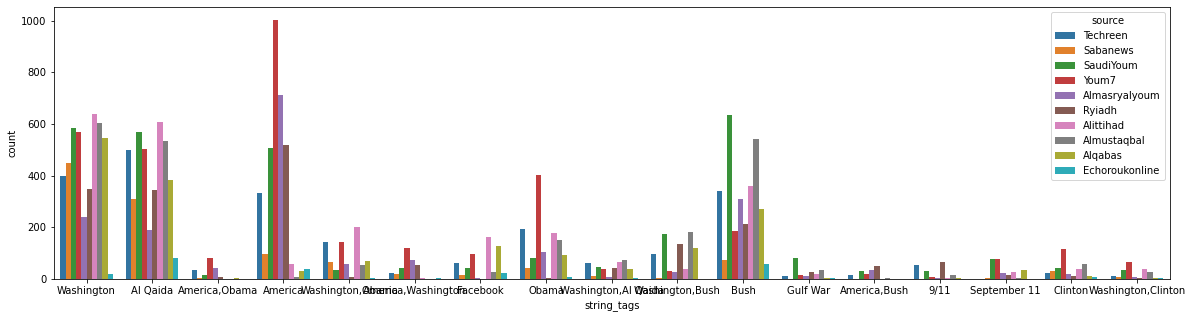

In [135]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(data=df, x= 'string_tags', hue='source')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20362 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           20362 non-null  int64         
 1   Unnamed: 0      20362 non-null  int64         
 2   id              20362 non-null  object        
 3   url             20362 non-null  object        
 4   headline        20362 non-null  object        
 5   dateline        20362 non-null  datetime64[ns]
 6   text            20362 non-null  object        
 7   tags            20362 non-null  object        
 8   source          20362 non-null  object        
 9   text_label      20362 non-null  object        
 10  text_score      20362 non-null  object        
 11  headline_label  20362 non-null  object        
 12  headline_score  20362 non-null  float64       
 13  tag_count       20362 non-null  int64         
 14  english_tags    20362 non-null  object        
 15  st

<AxesSubplot:xlabel='string_tags', ylabel='Percent'>

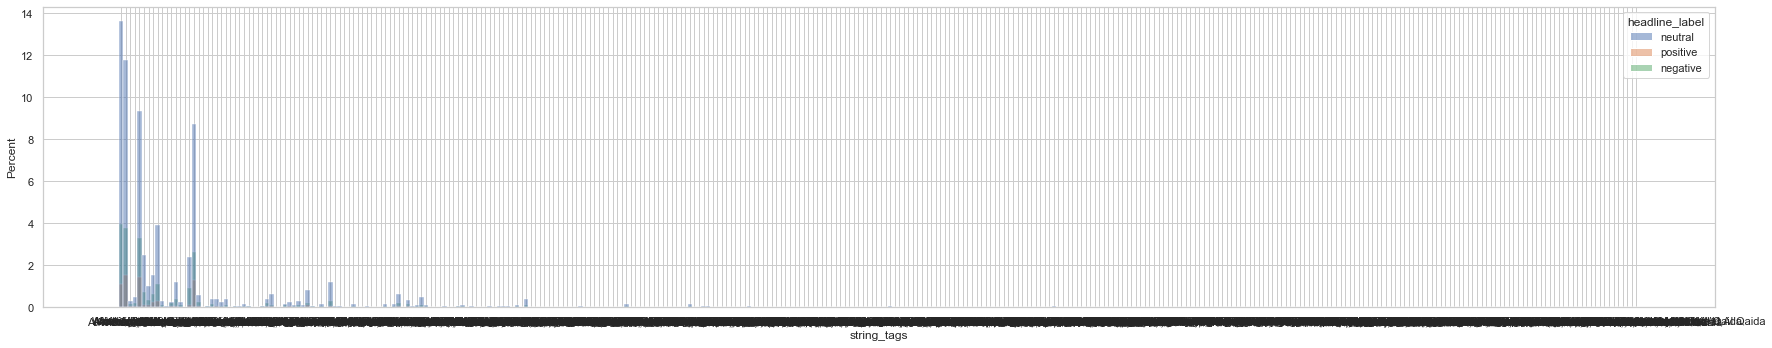

In [693]:
#do this only with top few frequency
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x= 'string_tags', hue='headline_label', stat='percent')

In [694]:
df = df[df.text_label != 'False']
tags = tags[tags.text_label != 'False']

In [727]:
bush = df[(df['string_tags'] == 'Bush')]
obama = df[(df['string_tags'] == 'Obama')]
clinton = df[(df['string_tags'] == 'Clinton')]

In [731]:
presidents = pd.concat([bush, obama, clinton])

In [733]:
presidents

,index,Unnamed: 0,id,url,headline,dateline,text,tags,source,text_label,text_score,headline_label,headline_score,tag_count,english_tags,string_tags,country
42,42,274932,TRN_ARB_0298228,http://tishreen.news.sy/tishreen/public/read/2...,روحاني: لا نسعى لحيازة أسلحة دمار شامل بل لتحق...,2013-09-24,\n24/09/2013\nطهران لن تقبل أبداً بدخول أي مفا...,['بوش'],Techreen,neutral,0.8795770009358724,neutral,0.912688,2986,[Bush],Bush,Syria
61,61,274951,TRN_ARB_0298352,http://tishreen.news.sy/tishreen/public/read/2...,أمل بوشوشة.. تخسر تألقها في الدراما المصرية,2013-09-25,\n25/09/2013\nأمل بوشوشة.. تخسر تألقها في الدر...,['بوش'],Techreen,negative,0.8605385422706604,negative,0.885104,2986,[Bush],Bush,Syria
107,107,274997,TRN_ARB_0298735,http://tishreen.news.sy/tishreen/public/read/2...,الإبداع واختفاء وجه المؤلف,2013-09-30,\n30/09/2013\nالإبداع واختفاء وجه المؤلف\nخليل...,['بوش'],Techreen,neutral,0.8396626909573873,neutral,0.654956,2986,[Bush],Bush,Syria
109,109,274999,TRN_ARB_0298757,http://tishreen.news.sy/tishreen/public/read/2...,خزائن التراث ..كشف الظنون,2013-09-30,\n30/09/2013\nخزائن التراث ..كشف الظنون\nكتاب ...,['بوش'],Techreen,neutral,0.9544663429260254,neutral,0.868741,2986,[Bush],Bush,Syria
114,114,275004,TRN_ARB_0298773,http://tishreen.news.sy/tishreen/public/read/2...,بوشكوف: عدم رضا ماكين عن قرار مجلس الأمن حول «...,2013-09-30,\n30/09/2013\nبوشكوف: عدم رضا ماكين عن قرار مج...,['بوش'],Techreen,neutral,0.9441431760787964,neutral,0.878712,2986,[Bush],Bush,Syria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049,201,226182,SYM_ARB_0618833,http://www.alyaum.com/oldsite/issue/article.ph...,أوباما يختار جوزيف بايدن سليط اللسان لمنصب نائ...,2008-08-24,من المقرر ان يسمي الحزب الديموقراطي في مؤتمره ...,['كلينتون'],SaudiYoum,neutral,0.9918571710586548,neutral,0.989216,355,[Clinton],Clinton,Saudi_Arabia
23359,154,121534,QBS_ARB_0247321,http://www.alqabas.com.kw/print/260928,حياة هيلاري كلينتون يرويها كاشف ''ووترغيت,2007-04-24,أعلنت دار النشر الأميركية ''الفريد ايه كنوبف''...,['كلينتون'],Alqabas,neutral,0.9913930892944336,neutral,0.988809,355,[Clinton],Clinton,Kuwait
23360,155,121535,QBS_ARB_0247324,http://www.alqabas.com.kw/print/260931,حياة هيلاري كلينتون يرويها كاشف ''ووترغيت,2007-04-24,أعلنت دار النشر الأميركية ''الفريد ايه كنوبف''...,['كلينتون'],Alqabas,neutral,0.9913930892944336,neutral,0.988809,355,[Clinton],Clinton,Kuwait
23383,178,121558,QBS_ARB_0247595,http://www.alqabas.com.kw/print/261206,''كداب.. يا خيشه,2007-04-25,عندما غنى شعبان عبدالرحيم:\n''كداب يا خيشه.. ك...,['كلينتون'],Alqabas,negative,0.9820491075515747,negative,0.997494,355,[Clinton],Clinton,Kuwait


In [695]:
washington = df[(df['string_tags'] == 'Washington')]
al_q = df[(df['string_tags'] == 'Al Qaida')]
america = df[(df['string_tags'] == 'America')]

In [697]:
bush.text_label.value_counts(normalize = True)

neutral     0.736866
negative    0.205163
positive    0.057971
Name: text_label, dtype: float64

In [698]:
obama.text_label.value_counts(normalize = True)

neutral     0.739781
negative    0.225324
positive    0.034895
Name: text_label, dtype: float64

In [699]:
clinton.text_label.value_counts(normalize = True)

neutral     0.814815
negative    0.174074
positive    0.011111
Name: text_label, dtype: float64

In [700]:
len(clinton)

270

In [701]:
al_q.text_label.value_counts(normalize = True)

neutral     0.749302
negative    0.187151
positive    0.063547
Name: text_label, dtype: float64

In [702]:
washington.text_label.value_counts(normalize = True)

neutral     0.798902
negative    0.177116
positive    0.023982
Name: text_label, dtype: float64

In [262]:
america.text_label.value_counts(normalize = True)

neutral     0.618126
negative    0.317642
positive    0.064232
Name: text_label, dtype: float64

In [270]:
al_q.source.groupby(al_q.text_label).value_counts() 

text_label  source        
negative    Techreen          147
            SaudiYoum          72
            Youm7              63
            Almustaqbal        62
            Almasryalyoum      51
            Alqabas            45
            Ryiadh             39
            Alittihad          37
            Sabanews           11
            Echoroukonline      9
neutral     Youm7             344
            Almustaqbal       298
            SaudiYoum         296
            Alittihad         283
            Sabanews          249
            Alqabas           201
            Techreen          181
            Ryiadh            159
            Almasryalyoum      72
            Echoroukonline     63
positive    SaudiYoum          47
            Alittihad          34
            Ryiadh             24
            Sabanews           20
            Techreen           20
            Alqabas            13
            Youm7              10
            Almustaqbal         8
            Almasryal

<AxesSubplot:xlabel='source', ylabel='Count'>

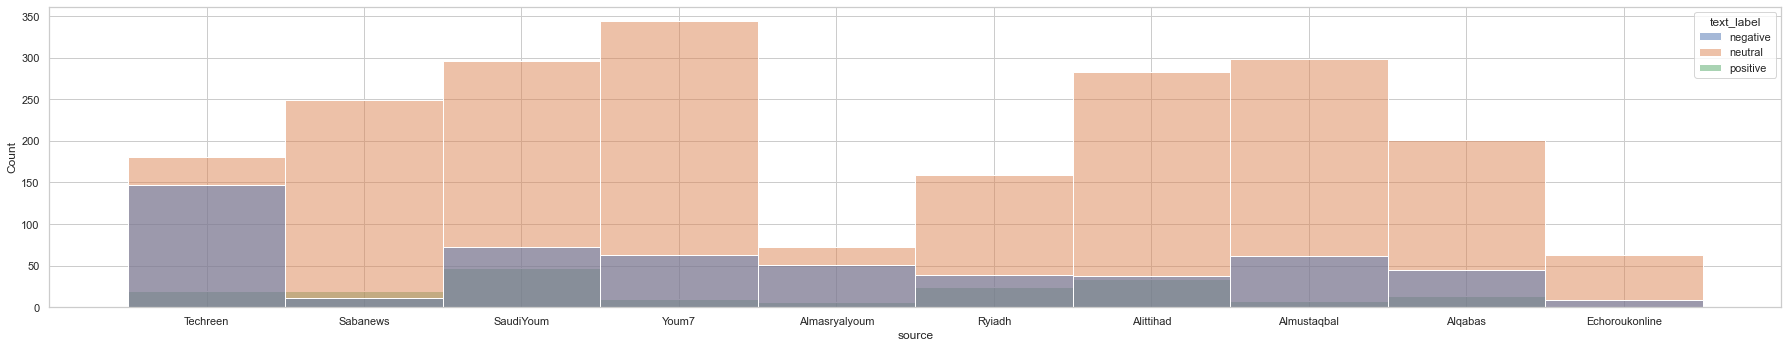

In [703]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=al_q, x='source', hue='text_label')

<AxesSubplot:xlabel='source', ylabel='Count'>

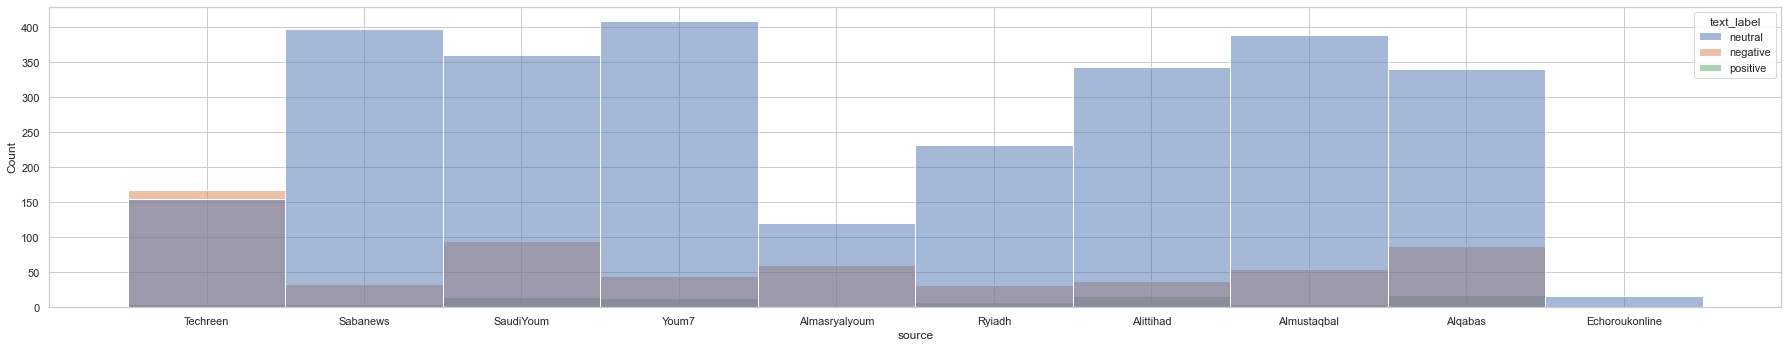

In [704]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=washington, x='source', hue='text_label')

In [705]:
df.source.value_counts()

Youm7             3134
SaudiYoum         2510
Techreen          2083
Almustaqbal       1870
Alittihad         1680
Almasryalyoum     1526
Alqabas           1463
Ryiadh            1347
Sabanews          1089
Echoroukonline     277
Name: source, dtype: int64

In [706]:
df['text_label'].groupby(df.source).value_counts()

source          text_label
Alittihad       neutral       1380
                negative       200
                positive       100
Almasryalyoum   neutral        943
                negative       536
                positive        47
Almustaqbal     neutral       1474
                negative       359
                positive        37
Alqabas         neutral       1102
                negative       295
                positive        66
Echoroukonline  neutral        217
                negative        52
                positive         8
Ryiadh          neutral        885
                negative       371
                positive        91
Sabanews        neutral        996
                negative        63
                positive        30
SaudiYoum       neutral       1817
                negative       514
                positive       179
Techreen        negative      1097
                neutral        926
                positive        60
Youm7           neutral     

In [728]:
df = df[df.text_label != 'False']

<AxesSubplot:xlabel='source', ylabel='Count'>

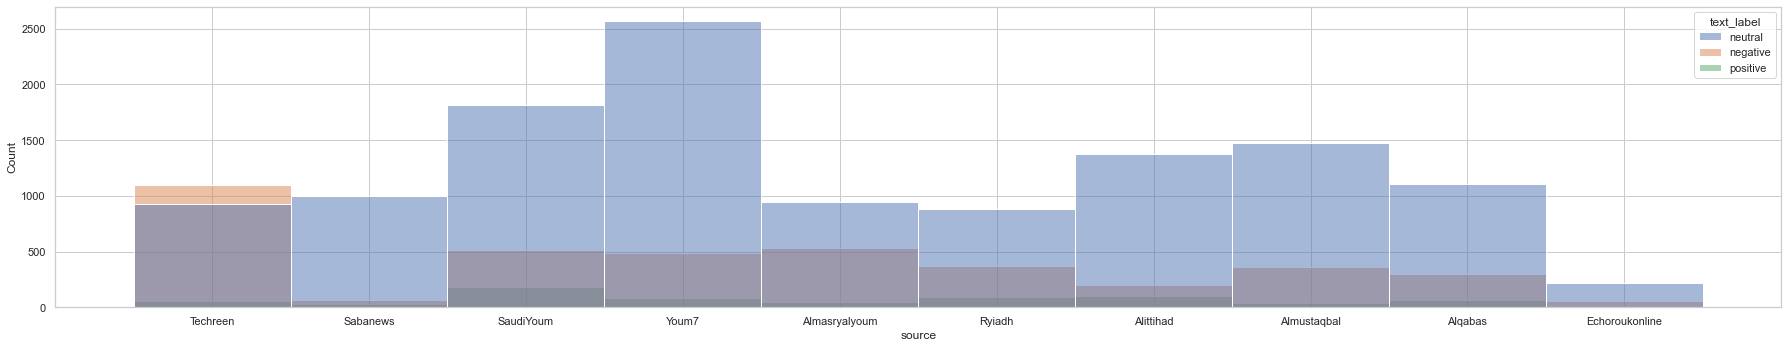

In [708]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x='source', hue='text_label')

Look at the high negatives here and also the one, maybe 2 that seem pretty neutral

In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           16979 non-null  int64         
 1   Unnamed: 0      16979 non-null  int64         
 2   id              16979 non-null  object        
 3   url             16979 non-null  object        
 4   headline        16979 non-null  object        
 5   dateline        16979 non-null  datetime64[ns]
 6   text            16979 non-null  object        
 7   tags            16979 non-null  object        
 8   source          16979 non-null  object        
 9   text_label      16979 non-null  object        
 10  text_score      16979 non-null  object        
 11  headline_label  16979 non-null  object        
 12  headline_score  16979 non-null  float64       
 13  tag_count       16979 non-null  int64         
 14  english_tags    16979 non-null  object        
 15  st

In [ ]:
# Alittihad UAE
# Echoroukonline Algeria
# Alriyadh Saudi Arabia
# Alyaum Saudi Arabia
# Tishreen Syria
# Alqabas Kuwait
# Almustaqbal Lebanon
# Almasryalyoum Egypt
# youm7 Egypt
# Sabanews Yemen

In [335]:
df.source.value_counts()

Youm7             3134
SaudiYoum         2510
Techreen          2083
Almustaqbal       1870
Alittihad         1680
Almasryalyoum     1526
Alqabas           1463
Ryiadh            1347
Sabanews          1089
Echoroukonline     277
Name: source, dtype: int64

In [710]:
transcription_table=pd.DataFrame(
    {
        'source': ['Alittihad','Echoroukonline','Ryiadh','SaudiYoum','Techreen', 'Alqabas', 'Almustaqbal','Almasryalyoum', 'Youm7','Sabanews'],
        'country': ['UAE','Algeria','Saudi_Arabia','Saudi_Arabia','Syria', 'Kuwait', 'Lebanon','Egypt','Egypt','Yemen']
    }
)

In [712]:
mapping = transcription_table.set_index('source').to_dict()['country']

# Apply mapping to a new column in the dataframe
# If no match is found, None will be filled in
df['country'] = df['source'].apply(lambda x: mapping.get(x))

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           16979 non-null  int64         
 1   Unnamed: 0      16979 non-null  int64         
 2   id              16979 non-null  object        
 3   url             16979 non-null  object        
 4   headline        16979 non-null  object        
 5   dateline        16979 non-null  datetime64[ns]
 6   text            16979 non-null  object        
 7   tags            16979 non-null  object        
 8   source          16979 non-null  object        
 9   text_label      16979 non-null  object        
 10  text_score      16979 non-null  object        
 11  headline_label  16979 non-null  object        
 12  headline_score  16979 non-null  float64       
 13  tag_count       16979 non-null  int64         
 14  country         16979 non-null  object        
 15  co

In [371]:
df.country.value_counts()

Egypt           4660
Saudi_Arabia    3857
Syria           2083
Lebanon         1870
UAE             1680
Kuwait          1463
Yemen           1089
Algeria          277
Name: country, dtype: int64

<AxesSubplot:xlabel='source', ylabel='Count'>

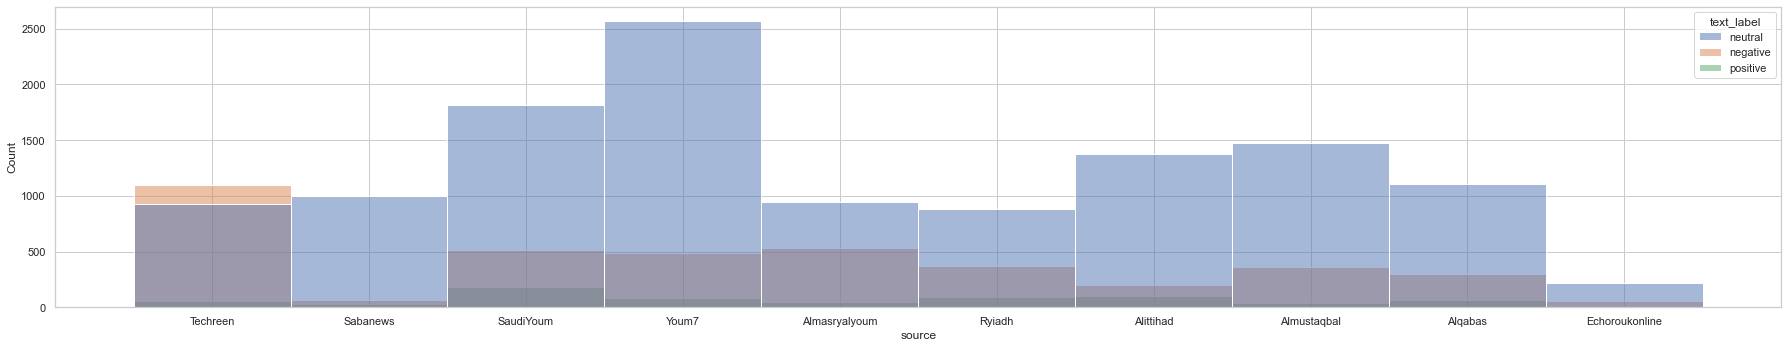

In [713]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x='source', hue='text_label')

<AxesSubplot:xlabel='country', ylabel='Count'>

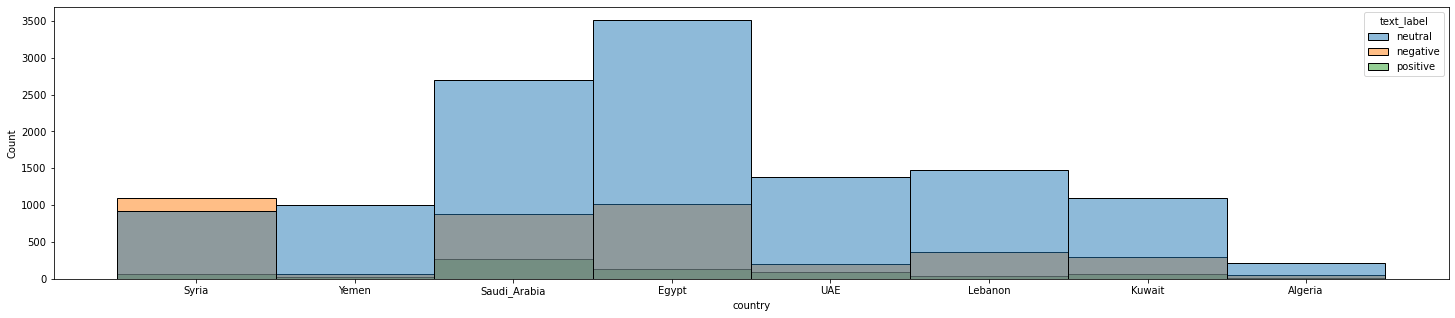

In [373]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x='country', hue='text_label')

Statistical Test

- H0: The news source and text_label (sentiment) are independent of one another
- H1: The news source and text_label (sentiment) are have a relationship

In [714]:
from scipy import stats
from scipy.stats import pearsonr, spearmanr

In [715]:
alpha =.05

observed = pd.crosstab(df.source, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


Statistical Test

- H0: The country of publication and text_label (sentiment) are independent of one another
- H1: The country of publication and text_label (sentiment) are have a relationship

In [716]:
alpha =.05

observed = pd.crosstab(df.country, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11809 entries, 0 to 23561
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           11809 non-null  int64         
 1   Unnamed: 0      11809 non-null  int64         
 2   id              11809 non-null  object        
 3   url             11809 non-null  object        
 4   headline        11809 non-null  object        
 5   dateline        11809 non-null  datetime64[ns]
 6   text            11809 non-null  object        
 7   tags            11809 non-null  object        
 8   source          11809 non-null  object        
 9   text_label      11809 non-null  object        
 10  text_score      11809 non-null  object        
 11  headline_label  11809 non-null  object        
 12  headline_score  11809 non-null  float64       
 13  tag_count       11809 non-null  int64         
 14  country         11809 non-null  object        
 15  co

Statistical Test

- H0: The top 5 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The top 5 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [717]:
alpha =.05

observed = pd.crosstab(df.string_tags, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


Statistical Test

- H0: The US president tags and and text_label (sentiment) are independent of one another
- H1:  The US president tags and text_label (sentiment) are have a relationship

In [734]:
presidents = presidents[presidents.text_label != 'False']

In [740]:
alpha =.05

observed = pd.crosstab(presidents.string_tags, presidents.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


In [739]:
## note, this last one was a bit closer so double check the results with more data

20.921451757234625

In [ ]:
# Alittihad UAE
# Echoroukonline Algeria
# riyadh Saudi Arabia
# saudi yaum Saudi Arabia
# Tishreen Syria
# Alqabas Kuwait
# Almustaqbal Lebanon
# Almasryalyoum Egypt
# youm7 Egypt
# Sabanews Yemen

#Saudi Arabia seems close in sentiment in both news sources
#Egypt's 2 sources, one seems like it may be much more neutral than the other. stat test on these 2 are needed

In [374]:
neg_sent = df[df.text_label == 'negative']
pos_sent = df[df.text_label == 'positive']
neut_sent = df[df.text_label == 'neutral']

In [443]:
df_pos = ((df.text_label == 'positive').groupby(df.source).sum() / df.source.value_counts()).sort_values(ascending=False)

In [445]:
df_neg = ((df.text_label == 'negative').groupby(df.source).sum() / df.source.value_counts()).sort_values(ascending=False)
df_neg = pd.DataFrame(df_neg)

In [412]:
df_neu = ((df.text_label == 'neutral').groupby(df.source).sum() / df.source.value_counts()).sort_values(ascending=False)

very clear that Sabanews is most neutral and Techreen is most biased w/high negative sentiment

No handles with labels found to put in legend.


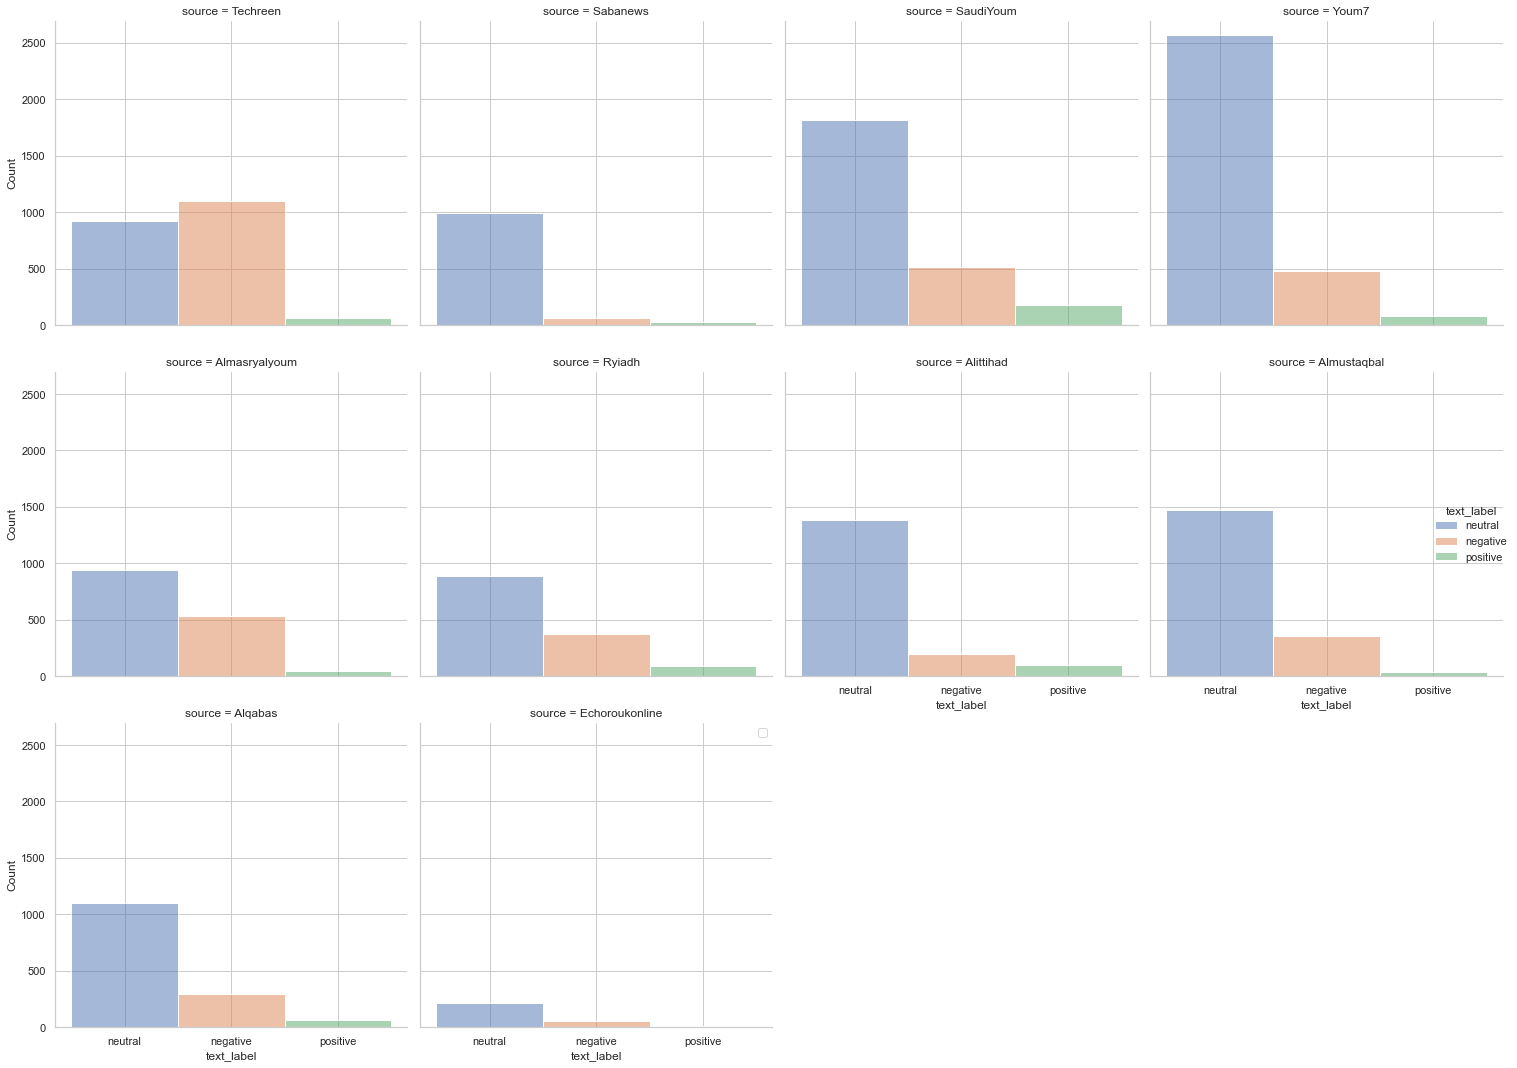

In [615]:
plt.rcParams["figure.figsize"] = (20,5)
sns.set_theme(style="whitegrid", palette='deep')

sns.displot(data=df, x= 'text_label', hue='text_label', col="source", col_wrap=4)
#plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.legend()
plt.show()

Mindy NLP EXPLORE

In [758]:
transcription_table=pd.DataFrame(
    {
        'source': ['Alittihad','Echoroukonline','Ryiadh','SaudiYoum','Techreen', 'Alqabas', 'Almustaqbal','Almasryalyoum', 'Youm7','Sabanews'],
        'year': [ 1969 , 1991 , 1965 , 1965 , 1975 ,  1972 ,  1999 , 2004 , 2008 , 1990]
    }
)

mapping = transcription_table.set_index('source').to_dict()['year']

df['source_start_year'] = df['source'].apply(lambda x: mapping.get(x))

In [749]:
import sklearn.preprocessing

In [759]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(df[['source_start_year']])

df['year_scaled'] = scaler.transform(df[['source_start_year']])

In [771]:
no_false = df[df.text_label != 'False']
label_map ={'neutral':0,
           'positive':1,
           'negative':-1}
df['label_value'] = no_false.text_label.map(label_map)

In [772]:
df['year_scaled']

-0.19270864008481065

<AxesSubplot:xlabel='text_label', ylabel='year_scaled'>

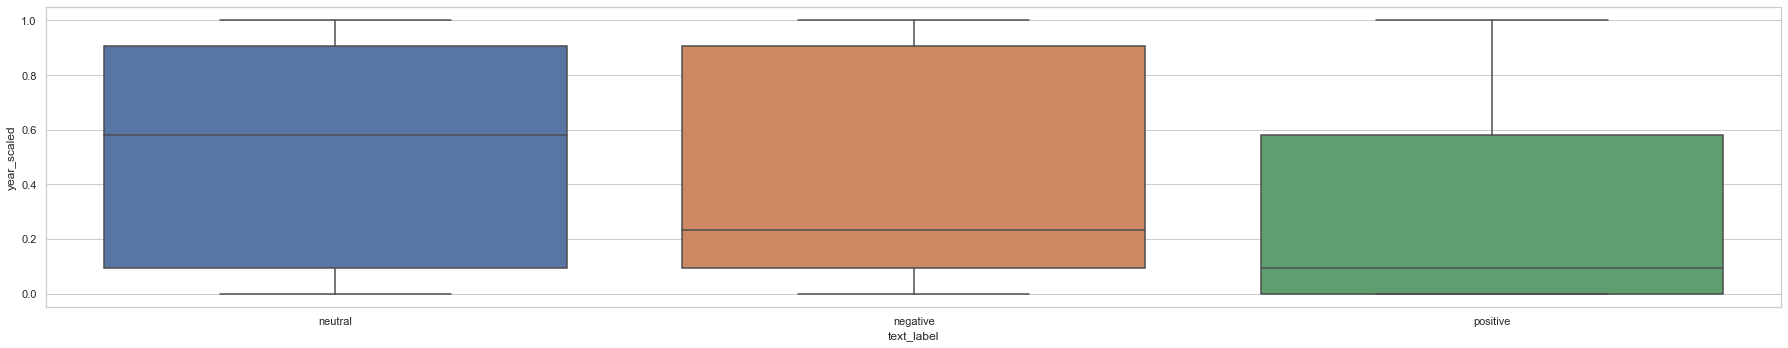

In [766]:
sns.boxplot(data=df, x='text_label', y='year_scaled')

In [783]:
scat = pd.DataFrame(df['label_value'].groupby(df['year_scaled']).mean())

<AxesSubplot:xlabel='year_scaled', ylabel='label_value'>

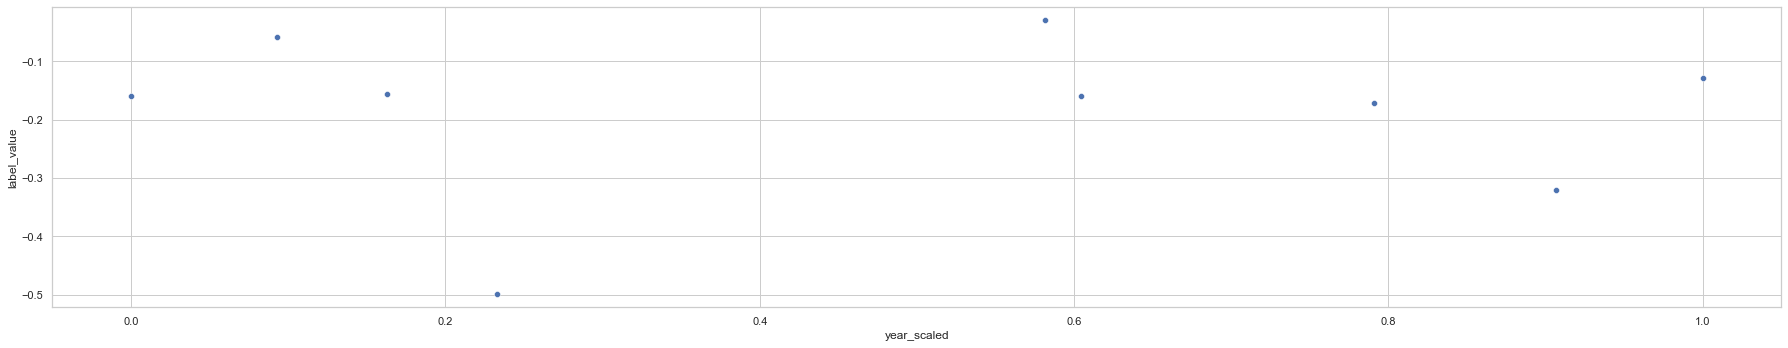

In [784]:
sns.scatterplot(data=scat, x='year_scaled', y='label_value')

In [2]:
import pandas as pd
import nltk

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 23561
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           16979 non-null  int64         
 1   Unnamed: 0      16979 non-null  int64         
 2   id              16979 non-null  object        
 3   url             16979 non-null  object        
 4   headline        16979 non-null  object        
 5   dateline        16979 non-null  datetime64[ns]
 6   text            16979 non-null  object        
 7   tags            16979 non-null  object        
 8   source          16979 non-null  object        
 9   text_label      16979 non-null  object        
 10  text_score      16979 non-null  object        
 11  headline_label  16979 non-null  object        
 12  headline_score  16979 non-null  float64       
 13  tag_count       16979 non-null  int64         
 14  english_tags    16979 non-null  object        
 15  st

In [34]:
df = pd.read_csv('single_word_counts.csv')

In [76]:
len(df)

2678648

In [791]:
df_1 = pd.read_csv('single_overall_counts_column.csv')

In [792]:
df_1

,word,overall_counts
0,محمد,379426
1,المتحده,353889
2,الرئيس,346037
3,الولايات,238214
4,الامريكيه,226292
...,...,...
2715622,اخطاقبل,1
2715623,الابراهيمكانت,1
2715624,التاريخيهعقب,1
2715625,العراقالبيئه,1


In [33]:
df = (df[df['techreen_counts'] > 10000])

In [42]:
#df = pd.read_csv('all_bigrams.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678648 entries, 0 to 2678647
Data columns (total 12 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   word                   object
 1   echoroukonline_counts  int64 
 2   sabanews_counts        int64 
 3   alqabas_counts         int64 
 4   alittihad_counts       int64 
 5   almasryalyoum_counts   int64 
 6   techreen_counts        int64 
 7   ryiadh_counts          int64 
 8   almustaqbal_counts     int64 
 9   saudiyoum_counts       int64 
 10  youm7_counts           int64 
 11  overall                int64 
dtypes: int64(11), object(1)
memory usage: 245.2+ MB


In [8]:
from ar_wordcloud import ArabicWordCloud
from ar_wordcloud.utils import read_mask_image
import arabic_reshaper
from bidi.algorithm import get_display

In [15]:
(df['overall'] > 20000).sum()

837

In [35]:
df = (df[df['overall'] > 20000])

In [36]:
df = df[df.word != 'ا']

In [37]:
df = df[df.word != 'ابراهيم']

In [38]:
ASW1 = [get_display(arabic_reshaper.reshape(x)) for x in df.word]

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

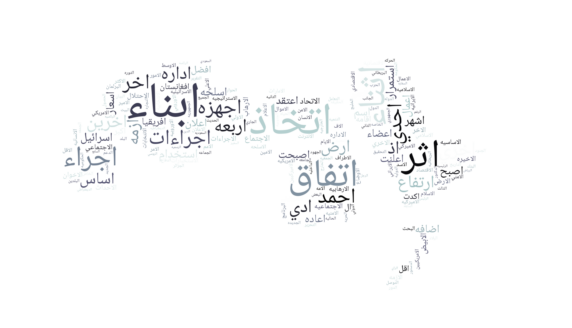

In [40]:
plt.figure(figsize=[10,12])
mask = np.array(Image.open("./map_trial.png"))
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False, mask=mask).generate(' '.join(ASW1))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()

In [41]:
df = pd.read_csv('all_bigrams.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bigram          47126 non-null  object
 1   alittihad       47126 non-null  int64 
 2   sabanews        47126 non-null  int64 
 3   echoroukonline  47126 non-null  int64 
 4   alqabas         47126 non-null  int64 
 5   almasryalyoum   47126 non-null  int64 
 6   techreen        47126 non-null  int64 
 7   ryiadh          47126 non-null  int64 
 8   almustaqbal     47126 non-null  int64 
 9   saudiyoum       47126 non-null  int64 
 10  youm7           47126 non-null  int64 
 11  overall         47126 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 4.3+ MB


In [62]:
(df['overall'] > 17000).sum()

42

In [63]:
df = df[df['overall'] > 17000]

In [64]:
ASW1 = [get_display(arabic_reshaper.reshape(x)) for x in df.bigram]

In [69]:
ASW1

["('ﻩﺪﺤﺘﻤﻟﺍ' ,'ﺕﺎﻳﻻﻮﻟﺍ')",
 "('ﻂﺳﻭﻻﺍ' ,'ﻕﺮﺸﻟﺍ')",
 "('ﻩﺪﺤﺘﻤﻟﺍ' ,'ﻢﻣﻻﺍ')",
 "('ﺎﻣﺎﺑﻭﺍ' ,'ﻙﺍﺭﺎﺑ')",
 "('ﻕﺍﺮﻌﻟﺍ' ,'ﻲﻓ')",
 "('ﻲﻜﻳﺮﻣﻻﺍ' ,'ﺲﻴﺋﺮﻟﺍ')",
 "('ﺵﻮﺑ' ,'ﺝﺭﻮﺟ')",
 "('ﺮﺼﻣ' ,'ﻲﻓ')",
 "('ﻩﺪﻋﺎﻘﻟﺍ' ,'ﻢﻴﻈﻨﺗ')",
 "('ﺾﻴﺑﻻﺍ' ,'ﺖﻴﺒﻟﺍ')",
 "('ﻦﻣﻻﺍ' ,'ﺲﻠﺠﻣ')",
 "('ﻲﻛﺮﻴﻣﻻﺍ' ,'ﺲﻴﺋﺮﻟﺍ')",
 "('ﺀﺍﺭﺯﻮﻟﺍ' ,'ﺲﻴﺋﺭ')",
 "('ﻪﻴﺑﺮﻌﻟﺍ' ,'ﻝﻭﺪﻟﺍ')",
 "('ﻪﻴﻜﻳﺮﻣﻻﺍ' ,'ﻩﺪﺤﺘﻤﻟﺍ')",
 "('ﻪﻴﺟﺭﺎﺨﻟﺍ' ,'ﻩﺭﺍﺯﻭ')",
 "('ﷲ' ,'ﺏﺰﺣ')",
 "('ﻪﻴﺟﺭﺎﺨﻟﺍ' ,'ﺮﻳﺯﻭ')",
 "('ﷲ' ,'ﺪﺒﻋ')",
 "('ﻲﻟﺍ' ,'ﻪﻓﺎﺿﻻﺎﺑ')",
 "('ﻲﺑﻭﺭﻭﻻﺍ' ,'ﺩﺎﺤﺗﻻﺍ')",
 "('ﻡﺎﻌﻟﺍ' ,'ﻦﻴﻣﻻﺍ')",
 "('ﻪﻴﺟﺭﺎﺨﻟﺍ' ,'ﻩﺮﻳﺯﻭ')",
 "('ﻡﻼﻋﻻﺍ' ,'ﻞﺋﺎﺳﻭ')",
 "('ﻥﺍ' ,'ﻪﻔﻴﺤﺼﻟﺍ')",
 "('ﺭﺎﻃﺍ' ,'ﻲﻓ')",
 "('ﻥﺎﺴﻧﻻﺍ' ,'ﻕﻮﻘﺣ')",
 "('ﻪﻴﻜﻳﺮﻣﻻﺍ' ,'ﻪﻴﺟﺭﺎﺨﻟﺍ')",
 "('ﻩﺪﺤﺘﻤﻟﺍ' ,'ﺕﺎﻳﻻﻮﻠﻟ')",
 "('ﻕﺮﺸﻟﺍ' ,'ﻲﻓ')",
 "('ﻙﺍﺭﺎﺑ' ,'ﻲﻜﻳﺮﻣﻻﺍ')",
 "('ﻪﻴﻜﻳﺮﻣﻻﺍ' ,'ﻩﺭﺍﺩﻻﺍ')",
 "('ﻦﻴﻤﻠﺴﻤﻟﺍ' ,'ﻥﺍﻮﺧﻻﺍ')",
 "('ﻥﺎﻨﺒﻟ' ,'ﻲﻓ')",
 "('ﺰﻳﺰﻌﻟﺍﺪﺒﻋ' ,'ﻦﺑ')",
 "('ﺲﻴﺋﺮﻟﺍ' ,'ﻥﺍ')",
 "('ﻩﺰﻏ' ,'ﻉﺎﻄﻗ')",
 "('ﻦﻴﻔﻳﺮﺸﻟﺍ' ,'ﻦﻴﻣﺮﺤﻟﺍ')",
 "('ﻦﻄﻨﺷﺍﻭ' ,'ﻲﻓ')",
 "('ﻪﻴﻛﺮﻴﻣﻻﺍ' ,'ﻪﻴﺟﺭﺎﺨﻟﺍ')",
 "('ﻪﻴﻛﺮﻴﻣﻻﺍ' ,'ﻩﺭﺍﺩﻻﺍ')",
 "('ﻖﻳﺮﻃ' ,'ﻦﻋ')"]

In [70]:
#data = {k[0] + ' ' + k[1]: v for k, v in ASW1.to_dict().items()}
img = ArabicWordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ASW1)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

AttributeError: 'list' object has no attribute 'items'

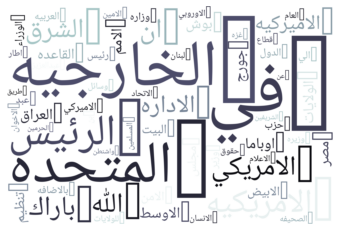

In [72]:
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False).generate(' '.join(ASW1))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()

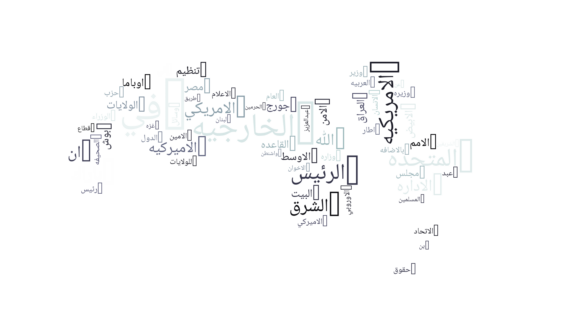

In [71]:
plt.figure(figsize=[10,12])
mask = np.array(Image.open("./map_trial.png"))
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False, mask=mask).generate(' '.join(ASW1))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()

In [78]:
perc = df.copy()

In [79]:
perc

,word,echoroukonline_counts,sabanews_counts,alqabas_counts,alittihad_counts,almasryalyoum_counts,techreen_counts,ryiadh_counts,almustaqbal_counts,saudiyoum_counts,youm7_counts,overall
33991,اخري,5700,738,10137,14935,11621,11717,15458,13607,20998,29964,134875
66111,اسرائيل,4446,570,7831,9417,15109,22336,16479,30151,22578,60400,189317
136326,الاداره,1670,314,6034,5359,4920,10517,7128,9956,11331,13258,70487
157613,الاسرائيلي,1848,378,3305,5223,6522,11531,5690,16410,10615,30771,92293
203890,الامن,5594,2171,11109,13646,9990,13846,12880,22643,19917,30257,142053
207561,الاميركي,520,728,16897,23438,11,30245,8125,42663,7027,608,130262
208047,الاميركيه,760,894,21977,29861,12,41993,10034,51268,8506,946,166251
373152,الحرب,2542,501,7199,6222,6643,17037,13199,15414,19731,13103,101591
387620,الحكومه,4445,1354,13428,16110,13435,12458,10142,28217,17251,45390,162230
401241,الخارجيه,3867,2208,11874,15962,12190,15952,12613,24115,19321,37515,155617


In [80]:
perc.set_index('word', inplace=True)

In [81]:
perc_T = perc.T

In [82]:
perc_T['total'] = perc_T.sum(axis=1, numeric_only= True)

In [83]:
perc_T

word,اخري,اسرائيل,الاداره,الاسرائيلي,الامن,الاميركي,الاميركيه,الحرب,الحكومه,الخارجيه,...,ليس,مجلس,واشنطن,وان,وقد,ولا,ومن,وهو,وهي,total
echoroukonline_counts,5700,4446,1670,1848,5594,520,760,2542,4445,3867,...,3213,2597,2744,5906,5720,7020,5524,8768,4909,190610
sabanews_counts,738,570,314,378,2171,728,894,501,1354,2208,...,334,1767,3399,796,700,406,753,717,468,52085
alqabas_counts,10137,7831,6034,3305,11109,16897,21977,7199,13428,11874,...,7332,16500,16970,11643,8947,11177,9690,13862,9161,488575
alittihad_counts,14935,9417,5359,5223,13646,23438,29861,6222,16110,15962,...,8352,16514,14684,12632,10309,10697,12223,20155,11223,595583
almasryalyoum_counts,11621,15109,4920,6522,9990,11,12,6643,13435,12190,...,9781,10965,9969,14170,6516,19581,9904,17490,8405,457611
techreen_counts,11717,22336,10517,11531,13846,30245,41993,17037,12458,15952,...,10106,13942,19454,14646,12782,14004,15245,14157,11098,782303
ryiadh_counts,15458,16479,7128,5690,12880,8125,10034,13199,10142,12613,...,14030,14066,15755,21040,17813,22916,18617,21658,16187,691507
almustaqbal_counts,13607,30151,9956,16410,22643,42663,51268,15414,28217,24115,...,13798,23793,25462,19875,11878,18683,13645,18919,12512,927280
saudiyoum_counts,20998,22578,11331,10615,19917,7027,8506,19731,17251,19321,...,16452,26040,20595,24318,20886,24700,23247,28570,19154,954702
youm7_counts,29964,60400,13258,30771,30257,608,946,13103,45390,37515,...,25551,45730,30204,44045,14777,38976,25608,44317,22311,1341490


In [84]:
#df.iloc[:, 1:].div(df.index,7 axis=0).mul(100).round(2).astype(str).add(' %')
perc_T = perc_T.apply(lambda x: x / x['total'] * 100, axis=1)

In [14]:
#perc = perc.T

In [15]:
#perc_T = perc.T

In [85]:
perc_T

word,اخري,اسرائيل,الاداره,الاسرائيلي,الامن,الاميركي,الاميركيه,الحرب,الحكومه,الخارجيه,...,ليس,مجلس,واشنطن,وان,وقد,ولا,ومن,وهو,وهي,total
echoroukonline_counts,2.990399,2.332511,0.876135,0.969519,2.934788,0.272808,0.398720,1.333613,2.331987,2.028750,...,1.685641,1.362468,1.439589,3.098473,3.000892,3.682913,2.898064,4.599969,2.575416,100.0
sabanews_counts,1.416915,1.094365,0.602861,0.725737,4.168187,1.397715,1.716425,0.961889,2.599597,4.239224,...,0.641259,3.392531,6.525871,1.528271,1.343957,0.779495,1.445714,1.376596,0.898531,100.0
alqabas_counts,2.074809,1.602825,1.235020,0.676457,2.273755,3.458425,4.498183,1.473469,2.748401,2.430333,...,1.500691,3.377168,3.473366,2.383053,1.831244,2.287673,1.983319,2.837231,1.875045,100.0
alittihad_counts,2.507627,1.581140,0.899791,0.876956,2.291200,3.935304,5.013743,1.044691,2.704913,2.680063,...,1.402323,2.772745,2.465483,2.120947,1.730909,1.796055,2.052275,3.384079,1.884372,100.0
almasryalyoum_counts,2.539493,3.301713,1.075149,1.425228,2.183077,0.002404,0.002622,1.451670,2.935900,2.663835,...,2.137405,2.396140,2.178488,3.096516,1.423917,4.278962,2.164284,3.822024,1.836713,100.0
techreen_counts,1.497757,2.855160,1.344364,1.473981,1.769902,3.866149,5.367869,2.177801,1.592478,2.039108,...,1.291827,1.782174,2.486760,1.872165,1.633894,1.790099,1.948733,1.809657,1.418632,100.0
ryiadh_counts,2.235408,2.383056,1.030792,0.822841,1.862599,1.174970,1.451034,1.908730,1.466652,1.823987,...,2.028902,2.034108,2.278357,3.042630,2.575968,3.313922,2.692236,3.132000,2.340830,100.0
almustaqbal_counts,1.467410,3.251553,1.073678,1.769692,2.441873,4.600876,5.528859,1.662281,3.042986,2.600617,...,1.488008,2.565892,2.745880,2.143366,1.280951,2.014818,1.471508,2.040268,1.349323,100.0
saudiyoum_counts,2.199430,2.364926,1.186862,1.111865,2.086201,0.736041,0.890959,2.066718,1.806951,2.023773,...,1.723260,2.727553,2.157218,2.547182,2.187698,2.587195,2.435001,2.992557,2.006280,100.0
youm7_counts,2.233636,4.502456,0.988304,2.293793,2.255477,0.045323,0.070519,0.976750,3.383551,2.796517,...,1.904673,3.408896,2.251526,3.283289,1.101536,2.905426,1.908922,3.303565,1.663151,100.0


In [86]:
perc = perc_T.T

In [87]:
perc

,echoroukonline_counts,sabanews_counts,alqabas_counts,alittihad_counts,almasryalyoum_counts,techreen_counts,ryiadh_counts,almustaqbal_counts,saudiyoum_counts,youm7_counts,overall
word,,,,,,,,,,,
اخري,2.990399,1.416915,2.074809,2.507627,2.539493,1.497757,2.235408,1.467410,2.199430,2.233636,2.080844
اسرائيل,2.332511,1.094365,1.602825,1.581140,3.301713,2.855160,2.383056,3.251553,2.364926,4.502456,2.920772
الاداره,0.876135,0.602861,1.235020,0.899791,1.075149,1.344364,1.030792,1.073678,1.186862,0.988304,1.087469
الاسرائيلي,0.969519,0.725737,0.676457,0.876956,1.425228,1.473981,0.822841,1.769692,1.111865,2.293793,1.423891
الامن,2.934788,4.168187,2.273755,2.291200,2.183077,1.769902,1.862599,2.441873,2.086201,2.255477,2.191585
الاميركي,0.272808,1.397715,3.458425,3.935304,0.002404,3.866149,1.174970,4.600876,0.736041,0.045323,2.009675
الاميركيه,0.398720,1.716425,4.498183,5.013743,0.002622,5.367869,1.451034,5.528859,0.890959,0.070519,2.564911
الحرب,1.333613,0.961889,1.473469,1.044691,1.451670,2.177801,1.908730,1.662281,2.066718,0.976750,1.567340
الحكومه,2.331987,2.599597,2.748401,2.704913,2.935900,1.592478,1.466652,3.042986,1.806951,3.383551,2.502875


In [65]:
#perc['overall'].quantile(.95)

0.008778365167639506

In [66]:
perc['overall'].sort_values(ascending=False).head(10)

word
total       100.000000
المتحده       9.731021
الرئيس        9.515111
الولايات      6.550261
العام         5.956098
حتي           5.945731
العراق        5.536433
العالم        5.429083
اسرائيل       5.205722
وهو           5.186363
Name: overall, dtype: float64

In [88]:
perc_T

word,اخري,اسرائيل,الاداره,الاسرائيلي,الامن,الاميركي,الاميركيه,الحرب,الحكومه,الخارجيه,...,ليس,مجلس,واشنطن,وان,وقد,ولا,ومن,وهو,وهي,total
echoroukonline_counts,2.990399,2.332511,0.876135,0.969519,2.934788,0.272808,0.398720,1.333613,2.331987,2.028750,...,1.685641,1.362468,1.439589,3.098473,3.000892,3.682913,2.898064,4.599969,2.575416,100.0
sabanews_counts,1.416915,1.094365,0.602861,0.725737,4.168187,1.397715,1.716425,0.961889,2.599597,4.239224,...,0.641259,3.392531,6.525871,1.528271,1.343957,0.779495,1.445714,1.376596,0.898531,100.0
alqabas_counts,2.074809,1.602825,1.235020,0.676457,2.273755,3.458425,4.498183,1.473469,2.748401,2.430333,...,1.500691,3.377168,3.473366,2.383053,1.831244,2.287673,1.983319,2.837231,1.875045,100.0
alittihad_counts,2.507627,1.581140,0.899791,0.876956,2.291200,3.935304,5.013743,1.044691,2.704913,2.680063,...,1.402323,2.772745,2.465483,2.120947,1.730909,1.796055,2.052275,3.384079,1.884372,100.0
almasryalyoum_counts,2.539493,3.301713,1.075149,1.425228,2.183077,0.002404,0.002622,1.451670,2.935900,2.663835,...,2.137405,2.396140,2.178488,3.096516,1.423917,4.278962,2.164284,3.822024,1.836713,100.0
techreen_counts,1.497757,2.855160,1.344364,1.473981,1.769902,3.866149,5.367869,2.177801,1.592478,2.039108,...,1.291827,1.782174,2.486760,1.872165,1.633894,1.790099,1.948733,1.809657,1.418632,100.0
ryiadh_counts,2.235408,2.383056,1.030792,0.822841,1.862599,1.174970,1.451034,1.908730,1.466652,1.823987,...,2.028902,2.034108,2.278357,3.042630,2.575968,3.313922,2.692236,3.132000,2.340830,100.0
almustaqbal_counts,1.467410,3.251553,1.073678,1.769692,2.441873,4.600876,5.528859,1.662281,3.042986,2.600617,...,1.488008,2.565892,2.745880,2.143366,1.280951,2.014818,1.471508,2.040268,1.349323,100.0
saudiyoum_counts,2.199430,2.364926,1.186862,1.111865,2.086201,0.736041,0.890959,2.066718,1.806951,2.023773,...,1.723260,2.727553,2.157218,2.547182,2.187698,2.587195,2.435001,2.992557,2.006280,100.0
youm7_counts,2.233636,4.502456,0.988304,2.293793,2.255477,0.045323,0.070519,0.976750,3.383551,2.796517,...,1.904673,3.408896,2.251526,3.283289,1.101536,2.905426,1.908922,3.303565,1.663151,100.0


In [89]:
A = perc

In [90]:
A = A.reset_index()

In [91]:
A

,word,echoroukonline_counts,sabanews_counts,alqabas_counts,alittihad_counts,almasryalyoum_counts,techreen_counts,ryiadh_counts,almustaqbal_counts,saudiyoum_counts,youm7_counts,overall
0,اخري,2.990399,1.416915,2.074809,2.507627,2.539493,1.497757,2.235408,1.467410,2.199430,2.233636,2.080844
1,اسرائيل,2.332511,1.094365,1.602825,1.581140,3.301713,2.855160,2.383056,3.251553,2.364926,4.502456,2.920772
2,الاداره,0.876135,0.602861,1.235020,0.899791,1.075149,1.344364,1.030792,1.073678,1.186862,0.988304,1.087469
3,الاسرائيلي,0.969519,0.725737,0.676457,0.876956,1.425228,1.473981,0.822841,1.769692,1.111865,2.293793,1.423891
4,الامن,2.934788,4.168187,2.273755,2.291200,2.183077,1.769902,1.862599,2.441873,2.086201,2.255477,2.191585
5,الاميركي,0.272808,1.397715,3.458425,3.935304,0.002404,3.866149,1.174970,4.600876,0.736041,0.045323,2.009675
6,الاميركيه,0.398720,1.716425,4.498183,5.013743,0.002622,5.367869,1.451034,5.528859,0.890959,0.070519,2.564911
7,الحرب,1.333613,0.961889,1.473469,1.044691,1.451670,2.177801,1.908730,1.662281,2.066718,0.976750,1.567340
8,الحكومه,2.331987,2.599597,2.748401,2.704913,2.935900,1.592478,1.466652,3.042986,1.806951,3.383551,2.502875
9,الخارجيه,2.028750,4.239224,2.430333,2.680063,2.663835,2.039108,1.823987,2.600617,2.023773,2.796517,2.400850


In [92]:
A = A[A['word'] != 'total']

In [93]:
translator = Translator()
A['english'] = A['word'].apply(lambda x: translator.translate(x, dest='en').text)

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_66024/3732773295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['english'] = A['word'].apply(lambda x: translator.translate(x, dest='en').text)


In [96]:
A = A.T

In [97]:
A

,word,echoroukonline_counts,sabanews_counts,alqabas_counts,alittihad_counts,almasryalyoum_counts,techreen_counts,ryiadh_counts,almustaqbal_counts,saudiyoum_counts,youm7_counts,overall,english
0,اخري,2.990399,1.416915,2.074809,2.507627,2.539493,1.497757,2.235408,1.46741,2.19943,2.233636,2.080844,Other
1,اسرائيل,2.332511,1.094365,1.602825,1.58114,3.301713,2.85516,2.383056,3.251553,2.364926,4.502456,2.920772,Israel
2,الاداره,0.876135,0.602861,1.23502,0.899791,1.075149,1.344364,1.030792,1.073678,1.186862,0.988304,1.087469,Administration
3,الاسرائيلي,0.969519,0.725737,0.676457,0.876956,1.425228,1.473981,0.822841,1.769692,1.111865,2.293793,1.423891,Israeli
4,الامن,2.934788,4.168187,2.273755,2.2912,2.183077,1.769902,1.862599,2.441873,2.086201,2.255477,2.191585,Security
5,الاميركي,0.272808,1.397715,3.458425,3.935304,0.002404,3.866149,1.17497,4.600876,0.736041,0.045323,2.009675,American
6,الاميركيه,0.39872,1.716425,4.498183,5.013743,0.002622,5.367869,1.451034,5.528859,0.890959,0.070519,2.564911,American
7,الحرب,1.333613,0.961889,1.473469,1.044691,1.45167,2.177801,1.90873,1.662281,2.066718,0.97675,1.56734,the war
8,الحكومه,2.331987,2.599597,2.748401,2.704913,2.9359,1.592478,1.466652,3.042986,1.806951,3.383551,2.502875,the government
9,الخارجيه,2.02875,4.239224,2.430333,2.680063,2.663835,2.039108,1.823987,2.600617,2.023773,2.796517,2.40085,Exterior


In [265]:
new = pd.read_csv('daily8_2.csv')

In [266]:
us = 'الولايات المتحدة'

In [276]:
united_states_per_source = []
names = []
for val in new.source.unique():
    df1 = new[new.source==val]
    df1 = df1[df1.text.str.contains(us)]
    df1 = df1[df1.text_label!='False']
    united_states_per_source.append(pd.Series(df1.text_label.value_counts(normalize=True), name=val))



df3= pd.concat(united_states_per_source, axis=1)

In [277]:
len(df1)

47

In [272]:
osama = 'أسامة بن لادن'

In [271]:
len(new)

23562

In [273]:
osama_per_source = []
names = []
for val in new.source.unique():
    df2 = new[new.source==val]
    df2 = df2[df2.text.str.contains(osama)]
len(df2)    

7

In [257]:
df = df[df.text_label!='False']
    osama_per_source.append(pd.Series(df.text_label.value_counts(normalize=True), name=val))



os = pd.concat(osama_per_source, axis=1)
os

3

In [250]:
# united_states_per_source = []
# names = []
# for val in new.source.unique():
#     df = new[new.source==val]
#     df = df[df.text.str.contains(us)]
#     df = df[df.text_label!='False']
#     united_states_per_source.append(pd.Series(df.text_label.value_counts(normalize=True), name=val))



# pd.concat(united_states_per_source, axis=1)

,Techreen,Sabanews,SaudiYoum,Youm7,Almasryalyoum,Ryiadh,Alittihad,Almustaqbal,Alqabas,Echoroukonline
negative,0.615484,0.092958,0.199783,0.126374,0.280660,0.176166,0.132509,0.160443,0.240741,0.238095
neutral,0.375484,0.901408,0.771987,0.857143,0.698113,0.800518,0.839223,0.831259,0.732804,0.738095
positive,0.009032,0.005634,0.028230,0.016484,0.021226,0.023316,0.028269,0.008299,0.026455,0.023810


In [141]:
df2

source,Alittihad,Almasryalyoum,Almustaqbal,Alqabas,Echoroukonline,Ryiadh,Sabanews,SaudiYoum,Techreen,Youm7,total
text_label,,,,,,,,,,,
negative,0.050113,0.134302,0.089952,0.073916,0.018041,0.092959,0.015786,0.128790,0.274868,0.121273,1.0
neutral,0.112104,0.076604,0.119740,0.089521,0.017709,0.071893,0.080910,0.147604,0.075223,0.208692,1.0
positive,0.142857,0.067143,0.052857,0.094286,0.012857,0.130000,0.042857,0.255714,0.085714,0.115714,1.0


In [97]:
new = new[new.text.str.contains(us)]


In [100]:
new.text_label.value_counts()
477/(477+291+7)

0.6154838709677419

In [119]:
df1 = pd.read_csv('daily8_2.csv')

In [136]:
df2 = pd.crosstab(df1.source, df1.text_label)

In [137]:
df2 = df2.drop(columns= 'False')

In [138]:
df2 = df2.T

In [139]:
df2['total'] = df2.sum(axis=1, numeric_only= True)
df2 = df2.apply(lambda x: x / x['total'], axis=1)

In [140]:
df2

source,Alittihad,Almasryalyoum,Almustaqbal,Alqabas,Echoroukonline,Ryiadh,Sabanews,SaudiYoum,Techreen,Youm7,total
text_label,,,,,,,,,,,
negative,0.050113,0.134302,0.089952,0.073916,0.018041,0.092959,0.015786,0.128790,0.274868,0.121273,1.0
neutral,0.112104,0.076604,0.119740,0.089521,0.017709,0.071893,0.080910,0.147604,0.075223,0.208692,1.0
positive,0.142857,0.067143,0.052857,0.094286,0.012857,0.130000,0.042857,0.255714,0.085714,0.115714,1.0


In [209]:
import helper

techreen = new[new.source=='Techreen']
techreen = techreen[techreen.text_label!='False']
techreen.dateline = helper.make_datetime(techreen).dateline.astype('datetime64')

techreen.dateline

TRN_ARB_0297955 successful
TRN_ARB_0297958 successful
TRN_ARB_0297960 successful
TRN_ARB_0297984 successful
TRN_ARB_0298010 successful
TRN_ARB_0298015 successful
TRN_ARB_0298017 successful
TRN_ARB_0298018 successful
TRN_ARB_0298039 successful
TRN_ARB_0298057 successful
TRN_ARB_0298060 successful
TRN_ARB_0298061 successful
TRN_ARB_0298062 successful
TRN_ARB_0298067 successful
TRN_ARB_0298068 successful
TRN_ARB_0298071 successful
TRN_ARB_0298088 successful
TRN_ARB_0298128 successful
TRN_ARB_0298134 successful
TRN_ARB_0298153 successful
TRN_ARB_0298162 successful
TRN_ARB_0298163 successful
TRN_ARB_0298165 successful
TRN_ARB_0298173 successful
TRN_ARB_0298176 successful
TRN_ARB_0298178 successful
TRN_ARB_0298184 successful
TRN_ARB_0298185 successful
TRN_ARB_0298198 successful
TRN_ARB_0298199 successful
TRN_ARB_0298228 successful
TRN_ARB_0298229 successful
TRN_ARB_0298250 successful
TRN_ARB_0298256 successful
TRN_ARB_0298257 successful
TRN_ARB_0298271 successful
TRN_ARB_0298292 successful
T

TRN_ARB_0269836 successful
TRN_ARB_0269839 successful
TRN_ARB_0269847 successful
TRN_ARB_0269852 successful
TRN_ARB_0269896 successful
TRN_ARB_0269901 successful
TRN_ARB_0269916 successful
TRN_ARB_0269920 successful
TRN_ARB_0269927 successful
TRN_ARB_0269994 successful
TRN_ARB_0270039 successful
TRN_ARB_0270078 successful
TRN_ARB_0270097 successful
TRN_ARB_0270098 successful
TRN_ARB_0270114 successful
TRN_ARB_0270116 successful
TRN_ARB_0270122 successful
TRN_ARB_0270136 successful
TRN_ARB_0270159 successful
TRN_ARB_0270187 successful
TRN_ARB_0270191 successful
TRN_ARB_0270221 successful
TRN_ARB_0270224 successful
TRN_ARB_0270233 successful
TRN_ARB_0270240 successful
TRN_ARB_0270243 successful
TRN_ARB_0270250 successful
TRN_ARB_0270253 successful
TRN_ARB_0270256 successful
TRN_ARB_0270257 successful
TRN_ARB_0270259 successful
TRN_ARB_0270315 successful
TRN_ARB_0270316 successful
TRN_ARB_0270323 successful
TRN_ARB_0270324 successful
TRN_ARB_0270331 successful
TRN_ARB_0270357 successful
T

TRN_ARB_0229851 successful
TRN_ARB_0229855 successful
TRN_ARB_0229897 successful
TRN_ARB_0229903 successful
TRN_ARB_0229906 successful
TRN_ARB_0229972 successful
TRN_ARB_0229973 successful
TRN_ARB_0229974 successful
TRN_ARB_0229989 successful
TRN_ARB_0229990 successful
TRN_ARB_0229991 successful
TRN_ARB_0230022 successful
TRN_ARB_0230023 successful
TRN_ARB_0230051 successful
TRN_ARB_0230059 successful
TRN_ARB_0230063 successful
TRN_ARB_0230085 successful
TRN_ARB_0230086 successful
TRN_ARB_0230088 successful
TRN_ARB_0230089 successful
TRN_ARB_0230094 successful
TRN_ARB_0230111 successful
TRN_ARB_0230131 successful
TRN_ARB_0230152 successful
TRN_ARB_0230172 successful
TRN_ARB_0230174 successful
TRN_ARB_0230178 successful
TRN_ARB_0230179 successful
TRN_ARB_0230223 successful
TRN_ARB_0230228 successful
TRN_ARB_0230254 successful
TRN_ARB_0230273 successful
TRN_ARB_0230275 successful
TRN_ARB_0230279 successful
TRN_ARB_0230284 successful
TRN_ARB_0230285 successful
TRN_ARB_0230336 successful
T

TRN_ARB_0168480 successful
TRN_ARB_0168491 successful
TRN_ARB_0168493 successful
TRN_ARB_0168497 successful
TRN_ARB_0168543 successful
TRN_ARB_0168545 successful
TRN_ARB_0168553 successful
TRN_ARB_0168564 successful
TRN_ARB_0168566 successful
TRN_ARB_0168592 successful
TRN_ARB_0168593 successful
TRN_ARB_0168594 successful
TRN_ARB_0168605 successful
TRN_ARB_0168614 successful
TRN_ARB_0168617 successful
TRN_ARB_0168629 successful
TRN_ARB_0168649 successful
TRN_ARB_0168695 successful
TRN_ARB_0168696 successful
TRN_ARB_0168698 successful
TRN_ARB_0168704 successful
TRN_ARB_0168705 successful
TRN_ARB_0168763 successful
TRN_ARB_0168845 successful
TRN_ARB_0168857 successful
TRN_ARB_0168861 successful
TRN_ARB_0168869 successful
TRN_ARB_0168877 successful
TRN_ARB_0168925 successful
TRN_ARB_0168976 successful
TRN_ARB_0168982 successful
TRN_ARB_0169021 successful
TRN_ARB_0169024 successful
TRN_ARB_0169026 successful
TRN_ARB_0169033 successful
TRN_ARB_0169057 successful
TRN_ARB_0169101 successful
T

TRN_ARB_0201787 successful
TRN_ARB_0201794 successful
TRN_ARB_0201795 successful
TRN_ARB_0201798 successful
TRN_ARB_0201806 successful
TRN_ARB_0201810 successful
TRN_ARB_0201853 successful
TRN_ARB_0201921 successful
TRN_ARB_0201995 successful
TRN_ARB_0201998 successful
TRN_ARB_0202001 successful
TRN_ARB_0202003 successful
TRN_ARB_0202020 successful
TRN_ARB_0202021 successful
TRN_ARB_0202032 successful
TRN_ARB_0202058 successful
TRN_ARB_0202080 successful
TRN_ARB_0202091 successful
TRN_ARB_0202098 successful
TRN_ARB_0202105 successful
TRN_ARB_0202156 successful
TRN_ARB_0202168 successful
TRN_ARB_0202170 successful
TRN_ARB_0202174 successful
TRN_ARB_0202197 successful
TRN_ARB_0202218 successful
TRN_ARB_0202250 successful
TRN_ARB_0202265 successful
TRN_ARB_0202272 successful
TRN_ARB_0202273 successful
TRN_ARB_0202274 successful
TRN_ARB_0202275 successful
TRN_ARB_0202276 successful
TRN_ARB_0202277 successful
TRN_ARB_0202286 successful
TRN_ARB_0202323 successful
TRN_ARB_0202326 successful
T

0       2013-09-20
2       2013-09-20
3       2013-09-20
4       2013-09-22
7       2013-09-22
           ...    
14987   2007-07-23
14988   2007-07-23
14991   2007-07-23
14992   2007-07-23
14993   2007-07-23
Name: dateline, Length: 2083, dtype: datetime64[ns]

In [218]:
mask1=[False if int(val[:4]) >= 2012 else True for val in techreen.dateline.astype(str)]
mask2=[False if int(val[:4]) < 2012 else True for val in techreen.dateline.astype(str)]
techreen_less_2012 = techreen[mask1]
techreen_2012_gtr = techreen[mask2]

In [219]:
techreen_less_2012 = techreen[mask1]

In [220]:
techreen_2012_gtr = techreen[mask2]

In [221]:
print('techreen before 2012')
techreen_less_2012.text_label.value_counts(normalize=True)


techreen before 2012


negative    0.487677
neutral     0.484690
positive    0.027633
Name: text_label, dtype: float64

In [222]:
print('techreen after 2012')
techreen_2012_gtr.text_label.value_counts(normalize=True)

techreen after 2012


negative    0.596774
neutral     0.372312
positive    0.030914
Name: text_label, dtype: float64

would be v interesting to look at other data

In [200]:
new

,index,Unnamed: 0,id,url,headline,dateline,text,tags,source,text_label,text_score,headline_label,headline_score
0,0,274890,TRN_ARB_0297955,http://tishreen.news.sy/tishreen/public/read/2...,وزير الخارجية الصيني: سنقوم بدور بنّاء وإيجابي...,20/09/2013,\n20/09/2013\nوزير الخارجية الصيني: سنقوم بدور...,['واشنطن'],Techreen,neutral,0.9574713706970215,neutral,0.538953
1,1,274891,TRN_ARB_0297957,http://tishreen.news.sy/tishreen/public/read/2...,قواتنا الباسلة تضيّق الخناق على إرهابيي «القاع...,20/09/2013,\n20/09/2013\nضبط مستودع أسلحة للإرهابيين في د...,['القاعدة'],Techreen,False,False,positive,0.899801
2,2,274892,TRN_ARB_0297958,http://tishreen.news.sy/tishreen/public/read/2...,وزير الخارجية الإيراني: انضمام سورية لمعاهدة ح...,20/09/2013,\n20/09/2013\nوزير الخارجية الإيراني: انضمام س...,['واشنطن'],Techreen,neutral,0.5859406590461731,neutral,0.774108
3,3,274893,TRN_ARB_0297960,http://tishreen.news.sy/tishreen/public/read/2...,استمرار أمريكا وحلفائها بدعم وتسليح الإرهابيين...,20/09/2013,\n20/09/2013\n«الخارجية» في رسالتين إلى رئيس م...,"['أمريكا', 'القاعدة']",Techreen,negative,0.9461716612180074,negative,0.957832
4,4,274894,TRN_ARB_0297984,http://tishreen.news.sy/tishreen/public/read/2...,المفاوض الفلسطيني.. والسباحة من جديد في بحر ال...,22/09/2013,\n22/09/2013\nالمفاوض الفلسطيني.. والسباحة من ...,['واشنطن'],Techreen,negative,0.9543005029360453,negative,0.954988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,352,121732,QBS_ARB_0250040,http://www.alqabas.com.kw/print/263738,بوتفليقة يبحث مع كلينتون تعزيز الشراكة الاقتصا...,تم النشر في 2012/10/29,(كونا) -- بحث الرئيس الجزائري عبدالعزيز بوتفلي...,"['أمريكا', 'واشنطن', 'كلينتون']",Alqabas,neutral,0.990750253200531,neutral,0.994249
23558,353,121733,QBS_ARB_0250057,http://www.alqabas.com.kw/print/263755,الصراع في سوريا يشحذ عزيمة الجهاديين الأردنيين,تم النشر في 2012/10/29,عمان- سليمان الخالدي (رويترز)- يسلط إعلان الأر...,['القاعدة'],Alqabas,False,False,positive,0.820226
23559,354,121734,QBS_ARB_0250059,http://www.alqabas.com.kw/print/263757,العودة يدعو إلى الامتناع عن السفر إلى سوريا لل...,تم النشر في 2012/10/29,الرياض - يو بي آي - دعا عالم الدين السعودي، ال...,['القاعدة'],Alqabas,neutral,0.6828629374504089,neutral,0.902794
23560,355,121735,QBS_ARB_0250084,http://www.alqabas.com.kw/print/263784,ميامي وليكرز أبرز المرشحين لنيل اللقب,تم النشر في 2012/10/29,واشنطن - أ ف ب - يشهد الموسم المقبل من الدوري ...,"['واشنطن', 'بوش']",Alqabas,neutral,0.9449390172958374,neutral,0.904816


In [203]:
Techreen = new[new.source=='Techreen']
Techreen = Techreen[Techreen.text_label!='False']
Techreen.dateline = helper.make_datetime(Techreen).dateline.astype('datetime64').dateline

TRN_ARB_0297955 successful
TRN_ARB_0297958 successful
TRN_ARB_0297960 successful
TRN_ARB_0297984 successful
TRN_ARB_0298010 successful
TRN_ARB_0298015 successful
TRN_ARB_0298017 successful
TRN_ARB_0298018 successful
TRN_ARB_0298039 successful
TRN_ARB_0298057 successful
TRN_ARB_0298060 successful
TRN_ARB_0298061 successful
TRN_ARB_0298062 successful
TRN_ARB_0298067 successful
TRN_ARB_0298068 successful
TRN_ARB_0298071 successful
TRN_ARB_0298088 successful
TRN_ARB_0298128 successful
TRN_ARB_0298134 successful
TRN_ARB_0298153 successful
TRN_ARB_0298162 successful
TRN_ARB_0298163 successful
TRN_ARB_0298165 successful
TRN_ARB_0298173 successful
TRN_ARB_0298176 successful
TRN_ARB_0298178 successful
TRN_ARB_0298184 successful
TRN_ARB_0298185 successful
TRN_ARB_0298198 successful
TRN_ARB_0298199 successful
TRN_ARB_0298228 successful
TRN_ARB_0298229 successful
TRN_ARB_0298250 successful
TRN_ARB_0298256 successful
TRN_ARB_0298257 successful
TRN_ARB_0298271 successful
TRN_ARB_0298292 successful
T

TRN_ARB_0270361 successful
TRN_ARB_0270369 successful
TRN_ARB_0270385 successful
TRN_ARB_0270425 successful
TRN_ARB_0270428 successful
TRN_ARB_0270434 successful
TRN_ARB_0270437 successful
TRN_ARB_0270438 successful
TRN_ARB_0270450 successful
TRN_ARB_0270478 successful
TRN_ARB_0270514 successful
TRN_ARB_0270521 successful
TRN_ARB_0270531 successful
TRN_ARB_0270539 successful
TRN_ARB_0270545 successful
TRN_ARB_0270606 successful
TRN_ARB_0270612 successful
TRN_ARB_0270671 successful
TRN_ARB_0270693 successful
TRN_ARB_0270697 successful
TRN_ARB_0270747 successful
TRN_ARB_0270784 successful
TRN_ARB_0270799 successful
TRN_ARB_0270808 successful
TRN_ARB_0270811 successful
TRN_ARB_0270872 successful
TRN_ARB_0270890 successful
TRN_ARB_0279442 successful
TRN_ARB_0279484 successful
TRN_ARB_0279487 successful
TRN_ARB_0279506 successful
TRN_ARB_0279507 successful
TRN_ARB_0279522 successful
TRN_ARB_0279561 successful
TRN_ARB_0279591 successful
TRN_ARB_0279605 successful
TRN_ARB_0279618 successful
T

TRN_ARB_0229796 successful
TRN_ARB_0229799 successful
TRN_ARB_0229808 successful
TRN_ARB_0229809 successful
TRN_ARB_0229846 successful
TRN_ARB_0229847 successful
TRN_ARB_0229851 successful
TRN_ARB_0229855 successful
TRN_ARB_0229897 successful
TRN_ARB_0229903 successful
TRN_ARB_0229906 successful
TRN_ARB_0229972 successful
TRN_ARB_0229973 successful
TRN_ARB_0229974 successful
TRN_ARB_0229989 successful
TRN_ARB_0229990 successful
TRN_ARB_0229991 successful
TRN_ARB_0230022 successful
TRN_ARB_0230023 successful
TRN_ARB_0230051 successful
TRN_ARB_0230059 successful
TRN_ARB_0230063 successful
TRN_ARB_0230085 successful
TRN_ARB_0230086 successful
TRN_ARB_0230088 successful
TRN_ARB_0230089 successful
TRN_ARB_0230094 successful
TRN_ARB_0230111 successful
TRN_ARB_0230131 successful
TRN_ARB_0230152 successful
TRN_ARB_0230172 successful
TRN_ARB_0230174 successful
TRN_ARB_0230178 successful
TRN_ARB_0230179 successful
TRN_ARB_0230223 successful
TRN_ARB_0230228 successful
TRN_ARB_0230254 successful
T

TRN_ARB_0169265 successful
TRN_ARB_0169268 successful
TRN_ARB_0169279 successful
TRN_ARB_0169280 successful
TRN_ARB_0169288 successful
TRN_ARB_0169309 successful
TRN_ARB_0169316 successful
TRN_ARB_0169328 successful
TRN_ARB_0169359 successful
TRN_ARB_0169367 successful
TRN_ARB_0169368 successful
TRN_ARB_0169384 successful
TRN_ARB_0169413 successful
TRN_ARB_0169428 successful
TRN_ARB_0169433 successful
TRN_ARB_0169439 successful
TRN_ARB_0169445 successful
TRN_ARB_0169492 successful
TRN_ARB_0169499 successful
TRN_ARB_0169548 successful
TRN_ARB_0169568 successful
TRN_ARB_0169595 successful
TRN_ARB_0169599 successful
TRN_ARB_0169601 successful
TRN_ARB_0169618 successful
TRN_ARB_0169639 successful
TRN_ARB_0169697 successful
TRN_ARB_0169702 successful
TRN_ARB_0169706 successful
TRN_ARB_0169709 successful
TRN_ARB_0169715 successful
TRN_ARB_0169716 successful
TRN_ARB_0169717 successful
TRN_ARB_0169738 successful
TRN_ARB_0169740 successful
TRN_ARB_0169763 successful
TRN_ARB_0169764 successful
T

TRN_ARB_0113936 successful
TRN_ARB_0113937 successful
TRN_ARB_0113939 successful
TRN_ARB_0113950 successful
TRN_ARB_0114010 successful
TRN_ARB_0114011 successful
TRN_ARB_0114013 successful
TRN_ARB_0114021 successful
TRN_ARB_0114065 successful
TRN_ARB_0114077 successful
TRN_ARB_0114088 successful
TRN_ARB_0114091 successful
TRN_ARB_0114095 successful
TRN_ARB_0114098 successful
TRN_ARB_0114141 successful
TRN_ARB_0114142 successful
TRN_ARB_0114148 successful
TRN_ARB_0114150 successful
TRN_ARB_0114152 successful
TRN_ARB_0114154 successful
TRN_ARB_0114158 successful
TRN_ARB_0114160 successful
TRN_ARB_0114164 successful
TRN_ARB_0114181 successful
TRN_ARB_0114184 successful
TRN_ARB_0114190 successful
TRN_ARB_0114201 successful
TRN_ARB_0114246 successful
TRN_ARB_0114247 successful
TRN_ARB_0114248 successful
TRN_ARB_0114250 successful
TRN_ARB_0114251 successful
TRN_ARB_0114254 successful
TRN_ARB_0114259 successful
TRN_ARB_0114287 successful
TRN_ARB_0114292 successful
TRN_ARB_0114294 successful
T

AttributeError: 'Series' object has no attribute 'dateline'

In [204]:
#gtr_2012_mask=[False if int(val[:4]) < 2012 else True for val in Techreen.dateline.astype(str)]

ValueError: invalid literal for int() with base 10: '20/0'

In [205]:
#lss_thn_2012_mask = [True if int(val[:4]) < 2012 else False for val in Sabanews.dateline.astype(str)]

In [206]:
# post_2012_Sabanews = Sabanews[gtr_2012_mask]
# pre_2012_Sabanews = Sabanews[lss_thn_2012_mask]

In [230]:
new = helper.make_datetime(new)

TRN_ARB_0297955 successful
TRN_ARB_0297957 successful
TRN_ARB_0297958 successful
TRN_ARB_0297960 successful
TRN_ARB_0297984 successful
TRN_ARB_0297985 successful
TRN_ARB_0298009 successful
TRN_ARB_0298010 successful
TRN_ARB_0298011 successful
TRN_ARB_0298015 successful
TRN_ARB_0298017 successful
TRN_ARB_0298018 successful
TRN_ARB_0298039 successful
TRN_ARB_0298057 successful
TRN_ARB_0298060 successful
TRN_ARB_0298061 successful
TRN_ARB_0298062 successful
TRN_ARB_0298063 successful
TRN_ARB_0298065 successful
TRN_ARB_0298067 successful
TRN_ARB_0298068 successful
TRN_ARB_0298071 successful
TRN_ARB_0298072 successful
TRN_ARB_0298073 successful
TRN_ARB_0298074 successful
TRN_ARB_0298088 successful
TRN_ARB_0298128 successful
TRN_ARB_0298130 successful
TRN_ARB_0298134 successful
TRN_ARB_0298153 successful
TRN_ARB_0298162 successful
TRN_ARB_0298163 successful
TRN_ARB_0298165 successful
TRN_ARB_0298171 successful
TRN_ARB_0298173 successful
TRN_ARB_0298176 successful
TRN_ARB_0298178 successful
T

SBN_ARB_0091260 successful
SBN_ARB_0091264 successful
SBN_ARB_0091278 successful
SBN_ARB_0091309 successful
SBN_ARB_0091328 successful
SBN_ARB_0091345 successful
SBN_ARB_0091363 successful
SBN_ARB_0091368 successful
SBN_ARB_0091392 successful
SBN_ARB_0091404 successful
SBN_ARB_0091428 successful
SBN_ARB_0091437 successful
SBN_ARB_0091477 successful
SBN_ARB_0091494 successful
SBN_ARB_0091502 successful
SBN_ARB_0091505 successful
SBN_ARB_0091514 successful
SBN_ARB_0091531 successful
SBN_ARB_0091570 successful
SBN_ARB_0091577 successful
SBN_ARB_0091586 successful
SBN_ARB_0091654 successful
SBN_ARB_0091666 successful
SBN_ARB_0091689 successful
SBN_ARB_0091699 successful
SBN_ARB_0091705 successful
SBN_ARB_0091706 successful
SBN_ARB_0091708 successful
SBN_ARB_0091785 successful
SBN_ARB_0091788 successful
SBN_ARB_0091789 successful
SBN_ARB_0091795 successful
SBN_ARB_0091800 successful
SBN_ARB_0091809 successful
SBN_ARB_0091836 successful
SBN_ARB_0091878 successful
SBN_ARB_0091880 successful
S

YM7_ARB_0471924 successful
YM7_ARB_0471927 successful
YM7_ARB_0471928 successful
YM7_ARB_0471929 successful
YM7_ARB_0471932 successful
YM7_ARB_0471937 successful
YM7_ARB_0472027 successful
YM7_ARB_0472044 successful
YM7_ARB_0472084 successful
YM7_ARB_0472098 successful
YM7_ARB_0472121 successful
YM7_ARB_0472155 successful
YM7_ARB_0472158 successful
YM7_ARB_0472196 successful
YM7_ARB_0472197 successful
YM7_ARB_0472203 successful
YM7_ARB_0472212 successful
YM7_ARB_0472213 successful
YM7_ARB_0472318 successful
YM7_ARB_0472329 successful
YM7_ARB_0472351 successful
YM7_ARB_0472356 successful
YM7_ARB_0472375 successful
YM7_ARB_0472378 successful
YM7_ARB_0472390 successful
YM7_ARB_0472398 successful
YM7_ARB_0472406 successful
YM7_ARB_0472416 successful
YM7_ARB_0472429 successful
YM7_ARB_0472431 successful
YM7_ARB_0472463 successful
YM7_ARB_0472477 successful
YM7_ARB_0472509 successful
YM7_ARB_0472536 successful
YM7_ARB_0472537 successful
YM7_ARB_0472552 successful
YM7_ARB_0472553 successful
Y

TRN_ARB_0270425 successful
TRN_ARB_0270427 successful
TRN_ARB_0270428 successful
TRN_ARB_0270434 successful
TRN_ARB_0270437 successful
TRN_ARB_0270438 successful
TRN_ARB_0270450 successful
TRN_ARB_0270474 successful
TRN_ARB_0270478 successful
TRN_ARB_0270482 successful
TRN_ARB_0270514 successful
TRN_ARB_0270521 successful
TRN_ARB_0270531 successful
TRN_ARB_0270539 successful
TRN_ARB_0270544 successful
TRN_ARB_0270545 successful
TRN_ARB_0270594 successful
TRN_ARB_0270606 successful
TRN_ARB_0270611 successful
TRN_ARB_0270612 successful
TRN_ARB_0270664 successful
TRN_ARB_0270667 successful
TRN_ARB_0270671 successful
TRN_ARB_0270687 successful
TRN_ARB_0270693 successful
TRN_ARB_0270697 successful
TRN_ARB_0270747 successful
TRN_ARB_0270753 successful
TRN_ARB_0270784 successful
TRN_ARB_0270792 successful
TRN_ARB_0270799 successful
TRN_ARB_0270808 successful
TRN_ARB_0270811 successful
TRN_ARB_0270866 successful
TRN_ARB_0270868 successful
TRN_ARB_0270872 successful
TRN_ARB_0270880 successful
T

TRN_ARB_0280429 successful
TRN_ARB_0280521 successful
TRN_ARB_0280549 successful
TRN_ARB_0280554 successful
TRN_ARB_0280555 successful
TRN_ARB_0280556 successful
TRN_ARB_0280573 successful
TRN_ARB_0280574 successful
TRN_ARB_0280576 successful
TRN_ARB_0280644 successful
TRN_ARB_0280645 successful
TRN_ARB_0280650 successful
TRN_ARB_0280654 successful
TRN_ARB_0280655 successful
TRN_ARB_0280656 successful
TRN_ARB_0280673 successful
TRN_ARB_0280680 successful
TRN_ARB_0280695 successful
TRN_ARB_0280696 successful
TRN_ARB_0280717 successful
TRN_ARB_0280720 successful
TRN_ARB_0280757 successful
TRN_ARB_0280759 successful
TRN_ARB_0280783 successful
TRN_ARB_0280789 successful
TRN_ARB_0280794 successful
TRN_ARB_0280803 successful
TRN_ARB_0280807 successful
TRN_ARB_0280808 successful
TRN_ARB_0280809 successful
TRN_ARB_0280810 successful
TRN_ARB_0280811 successful
TRN_ARB_0280872 successful
TRN_ARB_0280897 successful
TRN_ARB_0280911 successful
TRN_ARB_0280914 successful
TRN_ARB_0280915 successful
T

MSY_ARB_0093490 successful
MSY_ARB_0093509 successful
MSY_ARB_0093524 successful
MSY_ARB_0093530 successful
MSY_ARB_0093531 successful
MSY_ARB_0093532 successful
MSY_ARB_0093543 successful
MSY_ARB_0093545 successful
MSY_ARB_0093552 successful
MSY_ARB_0093583 successful
MSY_ARB_0093601 successful
MSY_ARB_0093602 successful
MSY_ARB_0093605 successful
MSY_ARB_0093644 successful
MSY_ARB_0093653 successful
MSY_ARB_0093664 successful
MSY_ARB_0093681 successful
MSY_ARB_0093687 successful
MSY_ARB_0093696 successful
MSY_ARB_0093698 successful
MSY_ARB_0093702 successful
MSY_ARB_0093715 successful
MSY_ARB_0093724 successful
MSY_ARB_0093730 successful
MSY_ARB_0093738 successful
MSY_ARB_0093745 successful
MSY_ARB_0093768 successful
MSY_ARB_0093771 successful
MSY_ARB_0093775 successful
MSY_ARB_0093778 successful
MSY_ARB_0093781 successful
MSY_ARB_0093785 successful
MSY_ARB_0093790 successful
MSY_ARB_0093815 successful
MSY_ARB_0093817 successful
MSY_ARB_0093820 successful
MSY_ARB_0093829 successful
M

MSY_ARB_0179134 successful
MSY_ARB_0179147 successful
MSY_ARB_0179156 successful
MSY_ARB_0179192 successful
MSY_ARB_0179215 successful
MSY_ARB_0179230 successful
MSY_ARB_0179245 successful
MSY_ARB_0179260 successful
MSY_ARB_0179281 successful
MSY_ARB_0179285 successful
MSY_ARB_0179291 successful
MSY_ARB_0179299 successful
MSY_ARB_0179323 successful
MSY_ARB_0179333 successful
MSY_ARB_0179343 successful
MSY_ARB_0179386 successful
MSY_ARB_0179391 successful
MSY_ARB_0179392 successful
MSY_ARB_0179396 successful
MSY_ARB_0179398 successful
MSY_ARB_0179422 successful
MSY_ARB_0179424 successful
MSY_ARB_0179468 successful
MSY_ARB_0179474 successful
MSY_ARB_0179476 successful
MSY_ARB_0179498 successful
MSY_ARB_0179500 successful
MSY_ARB_0179503 successful
MSY_ARB_0179509 successful
MSY_ARB_0179514 successful
MSY_ARB_0179530 successful
MSY_ARB_0179548 successful
MSY_ARB_0179550 successful
MSY_ARB_0179552 successful
MSY_ARB_0179576 successful
MSY_ARB_0179577 successful
MSY_ARB_0179580 successful
M

YM7_ARB_0972503 successful
YM7_ARB_0972529 successful
YM7_ARB_0972542 successful
YM7_ARB_0972557 successful
YM7_ARB_0972567 successful
YM7_ARB_0972573 successful
YM7_ARB_0972708 successful
YM7_ARB_0972796 successful
YM7_ARB_0972804 successful
YM7_ARB_0972807 successful
YM7_ARB_0972815 successful
YM7_ARB_0972840 successful
YM7_ARB_0972842 successful
YM7_ARB_0972851 successful
YM7_ARB_0972858 successful
YM7_ARB_0972863 successful
YM7_ARB_0972907 successful
YM7_ARB_0972908 successful
YM7_ARB_0972990 successful
YM7_ARB_0973053 successful
YM7_ARB_0973100 successful
RYD_ARB_0098177 successful
RYD_ARB_0098181 successful
RYD_ARB_0098184 successful
RYD_ARB_0098227 successful
RYD_ARB_0098261 successful
RYD_ARB_0098278 successful
RYD_ARB_0098303 successful
RYD_ARB_0098305 successful
RYD_ARB_0098320 successful
RYD_ARB_0098336 successful
RYD_ARB_0098344 successful
RYD_ARB_0098354 successful
RYD_ARB_0098364 successful
RYD_ARB_0098369 successful
RYD_ARB_0098376 successful
RYD_ARB_0098411 successful
R

ETD_ARB_0109992 successful
ETD_ARB_0109998 successful
ETD_ARB_0109999 successful
ETD_ARB_0110001 successful
ETD_ARB_0110038 successful
ETD_ARB_0110073 successful
ETD_ARB_0110095 successful
ETD_ARB_0110100 successful
ETD_ARB_0110105 successful
ETD_ARB_0110136 successful
ETD_ARB_0110139 successful
ETD_ARB_0110140 successful
ETD_ARB_0110142 successful
ETD_ARB_0110143 successful
ETD_ARB_0110146 successful
ETD_ARB_0110147 successful
ETD_ARB_0110148 successful
ETD_ARB_0110151 successful
ETD_ARB_0110167 successful
ETD_ARB_0110180 successful
ETD_ARB_0110241 successful
ETD_ARB_0110249 successful
ETD_ARB_0110274 successful
ETD_ARB_0110276 successful
ETD_ARB_0110277 successful
ETD_ARB_0110332 successful
ETD_ARB_0110344 successful
ETD_ARB_0110349 successful
ETD_ARB_0110404 successful
ETD_ARB_0110405 successful
ETD_ARB_0110406 successful
ETD_ARB_0110410 successful
ETD_ARB_0110422 successful
ETD_ARB_0110424 successful
ETD_ARB_0110426 successful
ETD_ARB_0110445 successful
ETD_ARB_0110513 successful
E

MTL_ARB_0218886 successful
MTL_ARB_0218889 successful
MTL_ARB_0218890 successful
MTL_ARB_0218899 successful
MTL_ARB_0218902 successful
MTL_ARB_0218907 successful
MTL_ARB_0218929 successful
MTL_ARB_0218935 successful
MTL_ARB_0218939 successful
MTL_ARB_0218975 successful
MTL_ARB_0218999 successful
MTL_ARB_0219011 successful
MTL_ARB_0219015 successful
MTL_ARB_0219019 successful
MTL_ARB_0219027 successful
MTL_ARB_0219063 successful
MTL_ARB_0219065 successful
MTL_ARB_0219069 successful
MTL_ARB_0219072 successful
MTL_ARB_0219082 successful
MTL_ARB_0219105 successful
MTL_ARB_0219108 successful
MTL_ARB_0219113 successful
MTL_ARB_0219114 successful
MTL_ARB_0219117 successful
MTL_ARB_0219133 successful
MTL_ARB_0219136 successful
MTL_ARB_0219139 successful
MTL_ARB_0219156 successful
MTL_ARB_0219157 successful
MTL_ARB_0219210 successful
MTL_ARB_0219213 successful
MTL_ARB_0219221 successful
MTL_ARB_0219224 successful
MTL_ARB_0219225 successful
MTL_ARB_0219248 successful
MTL_ARB_0219278 successful
M

TRN_ARB_0229974 successful
TRN_ARB_0229984 successful
TRN_ARB_0229989 successful
TRN_ARB_0229990 successful
TRN_ARB_0229991 successful
TRN_ARB_0230015 successful
TRN_ARB_0230022 successful
TRN_ARB_0230023 successful
TRN_ARB_0230025 successful
TRN_ARB_0230051 successful
TRN_ARB_0230059 successful
TRN_ARB_0230063 successful
TRN_ARB_0230085 successful
TRN_ARB_0230086 successful
TRN_ARB_0230087 successful
TRN_ARB_0230088 successful
TRN_ARB_0230089 successful
TRN_ARB_0230091 successful
TRN_ARB_0230093 successful
TRN_ARB_0230094 successful
TRN_ARB_0230111 successful
TRN_ARB_0230127 successful
TRN_ARB_0230130 successful
TRN_ARB_0230131 successful
TRN_ARB_0230152 successful
TRN_ARB_0230172 successful
TRN_ARB_0230173 successful
TRN_ARB_0230174 successful
TRN_ARB_0230178 successful
TRN_ARB_0230179 successful
TRN_ARB_0230223 successful
TRN_ARB_0230228 successful
TRN_ARB_0230254 successful
TRN_ARB_0230272 successful
TRN_ARB_0230273 successful
TRN_ARB_0230274 successful
TRN_ARB_0230275 successful
T

MSY_ARB_0201862 successful
MSY_ARB_0201868 successful
MSY_ARB_0201871 successful
MSY_ARB_0201872 successful
MSY_ARB_0201878 successful
MSY_ARB_0201884 successful
MSY_ARB_0201911 successful
MSY_ARB_0201925 successful
MSY_ARB_0201927 successful
MSY_ARB_0201941 successful
MSY_ARB_0201967 successful
MSY_ARB_0201968 successful
MSY_ARB_0201974 successful
MSY_ARB_0201979 successful
MSY_ARB_0201980 successful
MSY_ARB_0201984 successful
MSY_ARB_0202008 successful
MSY_ARB_0202028 successful
MSY_ARB_0202060 successful
MSY_ARB_0202069 successful
MSY_ARB_0202072 successful
MSY_ARB_0202090 successful
MSY_ARB_0202113 successful
MSY_ARB_0202116 successful
MSY_ARB_0202119 successful
MSY_ARB_0202122 successful
MSY_ARB_0202130 successful
MSY_ARB_0202131 successful
MSY_ARB_0202134 successful
MSY_ARB_0202148 successful
MSY_ARB_0202151 successful
MSY_ARB_0202154 successful
MSY_ARB_0202158 successful
MSY_ARB_0202160 successful
MSY_ARB_0202188 successful
MSY_ARB_0202192 successful
MSY_ARB_0202194 successful
M

MTL_ARB_0128371 successful
MTL_ARB_0128377 successful
MTL_ARB_0128379 successful
MTL_ARB_0128390 successful
MTL_ARB_0128391 successful
MTL_ARB_0128417 successful
MTL_ARB_0128418 successful
MTL_ARB_0128420 successful
MTL_ARB_0128422 successful
MTL_ARB_0128425 successful
MTL_ARB_0128428 successful
MTL_ARB_0128493 successful
MTL_ARB_0128498 successful
MTL_ARB_0128510 successful
MTL_ARB_0128512 successful
MTL_ARB_0128515 successful
MTL_ARB_0128516 successful
MTL_ARB_0128518 successful
MTL_ARB_0128526 successful
MTL_ARB_0128529 successful
MTL_ARB_0128548 successful
MTL_ARB_0128559 successful
MTL_ARB_0128594 successful
MTL_ARB_0128595 successful
MTL_ARB_0128597 successful
MTL_ARB_0128601 successful
MTL_ARB_0128606 successful
MTL_ARB_0128607 successful
MTL_ARB_0128610 successful
MTL_ARB_0128612 successful
MTL_ARB_0128617 successful
MTL_ARB_0128623 successful
MTL_ARB_0128652 successful
MTL_ARB_0128663 successful
MTL_ARB_0128682 successful
MTL_ARB_0128686 successful
MTL_ARB_0128698 successful
M

SYM_ARB_0042835 successful
SYM_ARB_0042840 successful
SYM_ARB_0042842 successful
SYM_ARB_0042846 successful
SYM_ARB_0042874 successful
SYM_ARB_0042876 successful
SYM_ARB_0042888 successful
SYM_ARB_0042897 successful
SYM_ARB_0042904 successful
SYM_ARB_0042932 successful
SYM_ARB_0042954 successful
SYM_ARB_0042959 successful
SYM_ARB_0042980 successful
SYM_ARB_0042987 successful
SYM_ARB_0043011 successful
SYM_ARB_0043012 successful
SYM_ARB_0043018 successful
SYM_ARB_0043020 successful
SYM_ARB_0043023 successful
SYM_ARB_0043025 successful
SYM_ARB_0043027 successful
SYM_ARB_0043030 successful
SYM_ARB_0043031 successful
SYM_ARB_0043038 successful
SYM_ARB_0043047 successful
SYM_ARB_0043054 successful
SYM_ARB_0043055 successful
SYM_ARB_0043056 successful
SYM_ARB_0043059 successful
SYM_ARB_0043061 successful
SYM_ARB_0043076 successful
SYM_ARB_0043080 successful
SYM_ARB_0043082 successful
SYM_ARB_0043083 successful
SYM_ARB_0043114 successful
SYM_ARB_0043116 successful
SYM_ARB_0043153 successful
S

MSY_ARB_0030892 successful
MSY_ARB_0030918 successful
MSY_ARB_0030938 successful
MSY_ARB_0030946 successful
MSY_ARB_0030958 successful
MSY_ARB_0030990 successful
MSY_ARB_0031000 successful
QBS_ARB_0806517 successful
QBS_ARB_0806527 successful
QBS_ARB_0806563 successful
QBS_ARB_0806586 successful
QBS_ARB_0806591 successful
QBS_ARB_0806595 successful
QBS_ARB_0806601 successful
QBS_ARB_0806642 successful
QBS_ARB_0806649 successful
QBS_ARB_0806669 successful
QBS_ARB_0806670 successful
QBS_ARB_0806672 successful
QBS_ARB_0806676 successful
QBS_ARB_0806679 successful
QBS_ARB_0806685 successful
QBS_ARB_0806726 successful
QBS_ARB_0806752 successful
QBS_ARB_0806791 successful
QBS_ARB_0806909 successful
QBS_ARB_0806958 successful
QBS_ARB_0806976 successful
QBS_ARB_0806981 successful
QBS_ARB_0806995 successful
QBS_ARB_0806999 successful
QBS_ARB_0807003 successful
QBS_ARB_0807004 successful
QBS_ARB_0807013 successful
QBS_ARB_0807019 successful
QBS_ARB_0807024 successful
QBS_ARB_0807070 successful
Q

ETD_ARB_0065109 successful
ETD_ARB_0065112 successful
ETD_ARB_0065119 successful
ETD_ARB_0065122 successful
ETD_ARB_0065124 successful
ETD_ARB_0065126 successful
ETD_ARB_0065128 successful
ETD_ARB_0065139 successful
ETD_ARB_0065140 successful
ETD_ARB_0065142 successful
ETD_ARB_0065149 successful
ETD_ARB_0065150 successful
ETD_ARB_0065158 successful
ETD_ARB_0065168 successful
ETD_ARB_0065189 successful
ETD_ARB_0065226 successful
ETD_ARB_0065231 successful
ETD_ARB_0065232 successful
ETD_ARB_0065234 successful
ETD_ARB_0065240 successful
ETD_ARB_0065244 successful
ETD_ARB_0065245 successful
ETD_ARB_0065274 successful
ETD_ARB_0065275 successful
ETD_ARB_0065300 successful
ETD_ARB_0065306 successful
ETD_ARB_0065319 successful
ETD_ARB_0065330 successful
ETD_ARB_0065332 successful
ETD_ARB_0065333 successful
ETD_ARB_0065334 successful
ETD_ARB_0065335 successful
ETD_ARB_0065339 successful
ETD_ARB_0065340 successful
ETD_ARB_0065341 successful
ETD_ARB_0065344 successful
ETD_ARB_0065345 successful
E

MTL_ARB_0445970 successful
MTL_ARB_0446023 successful
MTL_ARB_0446027 successful
MTL_ARB_0446038 successful
MTL_ARB_0446077 successful
MTL_ARB_0446080 successful
MTL_ARB_0446081 successful
MTL_ARB_0446082 successful
MTL_ARB_0446088 successful
MTL_ARB_0446114 successful
MTL_ARB_0446118 successful
MTL_ARB_0446140 successful
MTL_ARB_0446144 successful
MTL_ARB_0446164 successful
MTL_ARB_0446174 successful
MTL_ARB_0446183 successful
MTL_ARB_0446184 successful
MTL_ARB_0446192 successful
MTL_ARB_0446198 successful
MTL_ARB_0446199 successful
MTL_ARB_0446203 successful
MTL_ARB_0446204 successful
MTL_ARB_0446205 successful
MTL_ARB_0446208 successful
MTL_ARB_0446209 successful
MTL_ARB_0446210 successful
MTL_ARB_0446224 successful
MTL_ARB_0446270 successful
MTL_ARB_0446277 successful
MTL_ARB_0446289 successful
MTL_ARB_0446297 successful
MTL_ARB_0446302 successful
MTL_ARB_0446310 successful
MTL_ARB_0446328 successful
MTL_ARB_0446331 successful
MTL_ARB_0446350 successful
MTL_ARB_0446352 successful
M

MTL_ARB_0333818 successful
MTL_ARB_0333824 successful
MTL_ARB_0333825 successful
MTL_ARB_0333829 successful
MTL_ARB_0333833 successful
MTL_ARB_0333834 successful
MTL_ARB_0333843 successful
MTL_ARB_0333844 successful
MTL_ARB_0333845 successful
MTL_ARB_0333848 successful
MTL_ARB_0333852 successful
MTL_ARB_0333853 successful
MTL_ARB_0333855 successful
MTL_ARB_0333859 successful
MTL_ARB_0333860 successful
MTL_ARB_0333864 successful
MTL_ARB_0333865 successful
MTL_ARB_0333892 successful
MTL_ARB_0333922 successful
MTL_ARB_0333925 successful
MTL_ARB_0333927 successful
MTL_ARB_0333930 successful
MTL_ARB_0334005 successful
MTL_ARB_0334009 successful
MTL_ARB_0334011 successful
MTL_ARB_0334012 successful
MTL_ARB_0334026 successful
MTL_ARB_0334027 successful
MTL_ARB_0334033 successful
MTL_ARB_0334045 successful
MTL_ARB_0334047 successful
MTL_ARB_0334058 successful
MTL_ARB_0334086 successful
MTL_ARB_0334092 successful
MTL_ARB_0334093 successful
MTL_ARB_0334094 successful
MTL_ARB_0334095 successful
M

SYM_ARB_0057221 successful
SYM_ARB_0057230 successful
SYM_ARB_0057234 successful
SYM_ARB_0057236 successful
SYM_ARB_0057237 successful
SYM_ARB_0057239 successful
SYM_ARB_0057241 successful
SYM_ARB_0057252 successful
SYM_ARB_0057397 successful
SYM_ARB_0057400 successful
SYM_ARB_0057413 successful
SYM_ARB_0057417 successful
SYM_ARB_0057427 successful
SYM_ARB_0057434 successful
SYM_ARB_0057452 successful
SYM_ARB_0057454 successful
SYM_ARB_0057460 successful
SYM_ARB_0057494 successful
SYM_ARB_0057496 successful
SYM_ARB_0057501 successful
SYM_ARB_0057509 successful
SYM_ARB_0057510 successful
SYM_ARB_0057575 successful
SYM_ARB_0057595 successful
SYM_ARB_0057636 successful
SYM_ARB_0057637 successful
SYM_ARB_0057642 successful
SYM_ARB_0057679 successful
SYM_ARB_0057682 successful
SYM_ARB_0057689 successful
SYM_ARB_0057690 successful
SYM_ARB_0057732 successful
SYM_ARB_0057777 successful
SYM_ARB_0057782 successful
SYM_ARB_0057785 successful
SYM_ARB_0057796 successful
SYM_ARB_0057807 successful
S

TRN_ARB_0167112 successful
TRN_ARB_0167153 successful
TRN_ARB_0167154 successful
TRN_ARB_0167156 successful
TRN_ARB_0167158 successful
TRN_ARB_0167164 successful
TRN_ARB_0167172 successful
TRN_ARB_0167197 successful
TRN_ARB_0167207 successful
TRN_ARB_0167211 successful
TRN_ARB_0167212 successful
TRN_ARB_0167213 successful
TRN_ARB_0167220 successful
TRN_ARB_0167232 successful
TRN_ARB_0167235 successful
TRN_ARB_0167255 successful
TRN_ARB_0167312 successful
TRN_ARB_0167318 successful
TRN_ARB_0167329 successful
TRN_ARB_0167350 successful
TRN_ARB_0167352 successful
TRN_ARB_0167357 successful
TRN_ARB_0167363 successful
TRN_ARB_0167365 successful
TRN_ARB_0167394 successful
TRN_ARB_0167397 successful
TRN_ARB_0167398 successful
TRN_ARB_0167404 successful
TRN_ARB_0167429 successful
TRN_ARB_0167433 successful
TRN_ARB_0167442 successful
TRN_ARB_0167446 successful
TRN_ARB_0167489 successful
TRN_ARB_0167491 successful
TRN_ARB_0167502 successful
TRN_ARB_0167504 successful
TRN_ARB_0167528 successful
T

SBN_ARB_0028045 successful
SBN_ARB_0028084 successful
SBN_ARB_0028124 successful
SBN_ARB_0028149 successful
SBN_ARB_0028188 successful
SBN_ARB_0028218 successful
SBN_ARB_0028219 successful
SBN_ARB_0028233 successful
SBN_ARB_0028279 successful
SBN_ARB_0028282 successful
SBN_ARB_0028322 successful
SBN_ARB_0028324 successful
SBN_ARB_0028348 successful
SBN_ARB_0028350 successful
SBN_ARB_0028399 successful
SBN_ARB_0028430 successful
SBN_ARB_0028435 successful
SBN_ARB_0028452 successful
SBN_ARB_0028458 successful
SBN_ARB_0028460 successful
SBN_ARB_0028466 successful
SBN_ARB_0028537 successful
SBN_ARB_0028538 successful
SBN_ARB_0028545 successful
SBN_ARB_0028547 successful
SBN_ARB_0028560 successful
SBN_ARB_0028612 successful
SBN_ARB_0028624 successful
SBN_ARB_0028646 successful
SBN_ARB_0028651 successful
SBN_ARB_0028655 successful
SBN_ARB_0028672 successful
SBN_ARB_0028736 successful
SBN_ARB_0028762 successful
SBN_ARB_0028767 successful
SBN_ARB_0028799 successful
SBN_ARB_0028800 successful
S

ETD_ARB_0200361 successful
ETD_ARB_0200363 successful
ETD_ARB_0200364 successful
ETD_ARB_0200368 successful
ETD_ARB_0200369 successful
ETD_ARB_0200374 successful
ETD_ARB_0200401 successful
ETD_ARB_0200410 successful
ETD_ARB_0200412 successful
ETD_ARB_0200415 successful
ETD_ARB_0200426 successful
ETD_ARB_0200428 successful
ETD_ARB_0200437 successful
ETD_ARB_0200441 successful
ETD_ARB_0200557 successful
ETD_ARB_0200559 successful
ETD_ARB_0200560 successful
ETD_ARB_0200565 successful
ETD_ARB_0200566 successful
ETD_ARB_0200567 successful
ETD_ARB_0200569 successful
ETD_ARB_0200575 successful
ETD_ARB_0200578 successful
ETD_ARB_0200580 successful
ETD_ARB_0200631 successful
ETD_ARB_0200635 successful
ETD_ARB_0200650 successful
ETD_ARB_0200652 successful
ETD_ARB_0200692 successful
ETD_ARB_0200694 successful
ETD_ARB_0200695 successful
ETD_ARB_0200718 successful
ETD_ARB_0200721 successful
ETD_ARB_0200759 successful
ETD_ARB_0200762 successful
ETD_ARB_0200764 successful
ETD_ARB_0200822 successful
E

ETD_ARB_0188736 successful
ETD_ARB_0188738 successful
ETD_ARB_0188740 successful
ETD_ARB_0188741 successful
ETD_ARB_0188742 successful
ETD_ARB_0188743 successful
ETD_ARB_0188765 successful
ETD_ARB_0188787 successful
ETD_ARB_0188792 successful
ETD_ARB_0188834 successful
ETD_ARB_0188876 successful
ETD_ARB_0188880 successful
ETD_ARB_0188899 successful
ETD_ARB_0188916 successful
ETD_ARB_0188918 successful
ETD_ARB_0188937 successful
ETD_ARB_0188986 successful
ETD_ARB_0189000 successful
ETD_ARB_0189071 successful
ETD_ARB_0189075 successful
ETD_ARB_0189079 successful
ETD_ARB_0189081 successful
ETD_ARB_0189096 successful
ETD_ARB_0189105 successful
ETD_ARB_0189106 successful
ETD_ARB_0189107 successful
ETD_ARB_0189108 successful
ETD_ARB_0189109 successful
ETD_ARB_0189113 successful
ETD_ARB_0189120 successful
ETD_ARB_0189125 successful
ETD_ARB_0189126 successful
ETD_ARB_0189127 successful
ETD_ARB_0189128 successful
ETD_ARB_0189134 successful
ETD_ARB_0189135 successful
ETD_ARB_0189140 successful
E

MTL_ARB_0143702 successful
MTL_ARB_0143727 successful
MTL_ARB_0143733 successful
MTL_ARB_0143745 successful
MTL_ARB_0143763 successful
MTL_ARB_0143784 successful
MTL_ARB_0143791 successful
MTL_ARB_0143798 successful
MTL_ARB_0143806 successful
MTL_ARB_0143818 successful
MTL_ARB_0143825 successful
MTL_ARB_0143826 successful
MTL_ARB_0143827 successful
MTL_ARB_0143829 successful
MTL_ARB_0143832 successful
MTL_ARB_0143835 successful
MTL_ARB_0143839 successful
MTL_ARB_0143857 successful
MTL_ARB_0143904 successful
MTL_ARB_0143905 successful
MTL_ARB_0143911 successful
MTL_ARB_0143931 successful
MTL_ARB_0143934 successful
MTL_ARB_0143935 successful
MTL_ARB_0143948 successful
MTL_ARB_0143972 successful
MTL_ARB_0143973 successful
MTL_ARB_0143975 successful
MTL_ARB_0144044 successful
MTL_ARB_0144049 successful
MTL_ARB_0144054 successful
MTL_ARB_0144065 successful
MTL_ARB_0144075 successful
MTL_ARB_0144111 successful
MTL_ARB_0144112 successful
MTL_ARB_0144114 successful
MTL_ARB_0144121 successful
M

RYD_ARB_0055970 successful
RYD_ARB_0055975 successful
RYD_ARB_0055976 successful
RYD_ARB_0056003 successful
RYD_ARB_0056100 successful
RYD_ARB_0056117 successful
RYD_ARB_0056127 successful
RYD_ARB_0056153 successful
RYD_ARB_0056178 successful
RYD_ARB_0056183 successful
RYD_ARB_0056204 successful
RYD_ARB_0056219 successful
RYD_ARB_0056229 successful
RYD_ARB_0056231 successful
RYD_ARB_0056233 successful
RYD_ARB_0056249 successful
RYD_ARB_0056252 successful
RYD_ARB_0056263 successful
RYD_ARB_0056283 successful
RYD_ARB_0056284 successful
RYD_ARB_0056285 successful
RYD_ARB_0056299 successful
RYD_ARB_0056301 successful
RYD_ARB_0056317 successful
RYD_ARB_0056337 successful
RYD_ARB_0056362 successful
RYD_ARB_0056381 successful
RYD_ARB_0056391 successful
RYD_ARB_0056423 successful
RYD_ARB_0056424 successful
RYD_ARB_0056453 successful
RYD_ARB_0056495 successful
RYD_ARB_0056555 successful
RYD_ARB_0056556 successful
RYD_ARB_0056557 successful
RYD_ARB_0056558 successful
RYD_ARB_0056560 successful
R

TRN_ARB_0201995 successful
TRN_ARB_0201998 successful
TRN_ARB_0201999 successful
TRN_ARB_0202001 successful
TRN_ARB_0202003 successful
TRN_ARB_0202004 successful
TRN_ARB_0202005 successful
TRN_ARB_0202020 successful
TRN_ARB_0202021 successful
TRN_ARB_0202026 successful
TRN_ARB_0202032 successful
TRN_ARB_0202058 successful
TRN_ARB_0202080 successful
TRN_ARB_0202091 successful
TRN_ARB_0202093 successful
TRN_ARB_0202098 successful
TRN_ARB_0202105 successful
TRN_ARB_0202156 successful
TRN_ARB_0202168 successful
TRN_ARB_0202170 successful
TRN_ARB_0202173 successful
TRN_ARB_0202174 successful
TRN_ARB_0202187 successful
TRN_ARB_0202197 successful
TRN_ARB_0202218 successful
TRN_ARB_0202224 successful
TRN_ARB_0202250 successful
TRN_ARB_0202265 successful
TRN_ARB_0202272 successful
TRN_ARB_0202273 successful
TRN_ARB_0202274 successful
TRN_ARB_0202275 successful
TRN_ARB_0202276 successful
TRN_ARB_0202277 successful
TRN_ARB_0202286 successful
TRN_ARB_0202296 successful
TRN_ARB_0202323 successful
T

YM7_ARB_0640017 successful
YM7_ARB_0640053 successful
YM7_ARB_0640072 successful
YM7_ARB_0640099 successful
YM7_ARB_0640109 successful
YM7_ARB_0640114 successful
YM7_ARB_0640126 successful
YM7_ARB_0640128 successful
YM7_ARB_0640182 successful
YM7_ARB_0640183 successful
YM7_ARB_0640195 successful
YM7_ARB_0640200 successful
YM7_ARB_0640204 successful
YM7_ARB_0640237 successful
YM7_ARB_0640241 successful
YM7_ARB_0640246 successful
YM7_ARB_0640275 successful
YM7_ARB_0640283 successful
YM7_ARB_0640289 successful
YM7_ARB_0640291 successful
YM7_ARB_0640295 successful
YM7_ARB_0640301 successful
YM7_ARB_0640307 successful
YM7_ARB_0640318 successful
YM7_ARB_0640333 successful
YM7_ARB_0640369 successful
YM7_ARB_0640382 successful
YM7_ARB_0640391 successful
YM7_ARB_0640395 successful
YM7_ARB_0640398 successful
YM7_ARB_0640427 successful
YM7_ARB_0640446 successful
YM7_ARB_0640455 successful
YM7_ARB_0640463 successful
YM7_ARB_0640481 successful
YM7_ARB_0640512 successful
YM7_ARB_0640518 successful
Y

MSY_ARB_0212137 successful
MSY_ARB_0212153 successful
MSY_ARB_0212156 successful
MSY_ARB_0212157 successful
MSY_ARB_0212159 successful
MSY_ARB_0212161 successful
MSY_ARB_0212163 successful
MSY_ARB_0212167 successful
MSY_ARB_0212181 successful
MSY_ARB_0212185 successful
MSY_ARB_0212193 successful
MSY_ARB_0212206 successful
MSY_ARB_0212210 successful
MSY_ARB_0212225 successful
MSY_ARB_0212226 successful
MSY_ARB_0212233 successful
MSY_ARB_0212263 successful
MSY_ARB_0212266 successful
MSY_ARB_0212274 successful
MSY_ARB_0212280 successful
MSY_ARB_0212295 successful
MSY_ARB_0212303 successful
MSY_ARB_0212305 successful
MSY_ARB_0212317 successful
MSY_ARB_0212318 successful
MSY_ARB_0212321 successful
MSY_ARB_0212338 successful
MSY_ARB_0212343 successful
MSY_ARB_0212353 successful
MSY_ARB_0212360 successful
MSY_ARB_0212397 successful
MSY_ARB_0212435 successful
MSY_ARB_0212441 successful
MSY_ARB_0212468 successful
MSY_ARB_0212477 successful
MSY_ARB_0212491 successful
MSY_ARB_0212502 successful
M

MSY_ARB_0215117 successful
MSY_ARB_0215118 successful
MSY_ARB_0215120 successful
MSY_ARB_0215121 successful
MSY_ARB_0215122 successful
MSY_ARB_0215125 successful
MSY_ARB_0215139 successful
MSY_ARB_0215141 successful
MSY_ARB_0215142 successful
MSY_ARB_0215148 successful
MSY_ARB_0215150 successful
MSY_ARB_0215158 successful
MSY_ARB_0215160 successful
MSY_ARB_0215163 successful
MSY_ARB_0215168 successful
MSY_ARB_0215169 successful
MSY_ARB_0215170 successful
MSY_ARB_0215171 successful
MSY_ARB_0215172 successful
MSY_ARB_0215173 successful
MSY_ARB_0215174 successful
MSY_ARB_0215181 successful
MSY_ARB_0215214 successful
MSY_ARB_0215224 successful
MSY_ARB_0215232 successful
MSY_ARB_0215236 successful
MSY_ARB_0215254 successful
MSY_ARB_0215260 successful
MSY_ARB_0215264 successful
MSY_ARB_0215266 successful
MSY_ARB_0215267 successful
MSY_ARB_0215268 successful
MSY_ARB_0215303 successful
MSY_ARB_0215308 successful
MSY_ARB_0215317 successful
MSY_ARB_0215319 successful
MSY_ARB_0215322 successful
M

ETD_ARB_0288527 successful
ETD_ARB_0288529 successful
ETD_ARB_0288535 successful
ETD_ARB_0288547 successful
ETD_ARB_0288564 successful
ETD_ARB_0288594 successful
ETD_ARB_0288599 successful
ETD_ARB_0288601 successful
ETD_ARB_0288622 successful
ETD_ARB_0288630 successful
ETD_ARB_0288632 successful
ETD_ARB_0288634 successful
ETD_ARB_0288636 successful
ETD_ARB_0288667 successful
ETD_ARB_0288678 successful
ETD_ARB_0288731 successful
ETD_ARB_0288756 successful
ETD_ARB_0288758 successful
ETD_ARB_0288759 successful
ETD_ARB_0288788 successful
ETD_ARB_0288800 successful
ETD_ARB_0288801 successful
ETD_ARB_0288806 successful
ETD_ARB_0288809 successful
ETD_ARB_0288824 successful
ETD_ARB_0288825 successful
ETD_ARB_0288827 successful
ETD_ARB_0288829 successful
ETD_ARB_0288834 successful
ETD_ARB_0288835 successful
ETD_ARB_0288836 successful
ETD_ARB_0288840 successful
ETD_ARB_0288843 successful
ETD_ARB_0288849 successful
ETD_ARB_0288855 successful
ETD_ARB_0288861 successful
ETD_ARB_0288868 successful
E

MTL_ARB_0307658 successful
MTL_ARB_0307664 successful
MTL_ARB_0307665 successful
MTL_ARB_0307668 successful
MTL_ARB_0307696 successful
MTL_ARB_0307702 successful
MTL_ARB_0307703 successful
MTL_ARB_0307704 successful
MTL_ARB_0307705 successful
MTL_ARB_0307706 successful
MTL_ARB_0307709 successful
MTL_ARB_0307792 successful
MTL_ARB_0307800 successful
MTL_ARB_0307802 successful
MTL_ARB_0307811 successful
MTL_ARB_0307814 successful
MTL_ARB_0307818 successful
MTL_ARB_0307863 successful
MTL_ARB_0307870 successful
MTL_ARB_0307873 successful
MTL_ARB_0307877 successful
MTL_ARB_0307880 successful
MTL_ARB_0307882 successful
MTL_ARB_0307883 successful
MTL_ARB_0307884 successful
MTL_ARB_0307885 successful
MTL_ARB_0307914 successful
MTL_ARB_0307964 successful
MTL_ARB_0307967 successful
MTL_ARB_0307968 successful
MTL_ARB_0307975 successful
MTL_ARB_0307976 successful
MTL_ARB_0307979 successful
MTL_ARB_0307980 successful
MTL_ARB_0308041 successful
MTL_ARB_0308042 successful
MTL_ARB_0308044 successful
M

RYD_ARB_0374588 successful
RYD_ARB_0374590 successful
RYD_ARB_0374601 successful
RYD_ARB_0374620 successful
RYD_ARB_0374642 successful
RYD_ARB_0374655 successful
RYD_ARB_0374661 successful
RYD_ARB_0374662 successful
RYD_ARB_0374663 successful
RYD_ARB_0374666 successful
RYD_ARB_0374677 successful
RYD_ARB_0374685 successful
RYD_ARB_0374686 successful
RYD_ARB_0374688 successful
RYD_ARB_0374699 successful
RYD_ARB_0374709 successful
RYD_ARB_0374717 successful
RYD_ARB_0374720 successful
RYD_ARB_0374722 successful
RYD_ARB_0374724 successful
RYD_ARB_0374726 successful
RYD_ARB_0374733 successful
RYD_ARB_0374745 successful
RYD_ARB_0374746 successful
RYD_ARB_0374748 successful
RYD_ARB_0374788 successful
RYD_ARB_0374791 successful
RYD_ARB_0374794 successful
RYD_ARB_0374795 successful
RYD_ARB_0374798 successful
RYD_ARB_0374836 successful
RYD_ARB_0374859 successful
RYD_ARB_0374872 successful
RYD_ARB_0374877 successful
RYD_ARB_0374890 successful
RYD_ARB_0374893 successful
RYD_ARB_0374896 successful
R

TRN_ARB_0115731 successful
TRN_ARB_0115732 successful
TRN_ARB_0115785 successful
TRN_ARB_0115792 successful
TRN_ARB_0115793 successful
TRN_ARB_0115797 successful
TRN_ARB_0115798 successful
TRN_ARB_0115803 successful
TRN_ARB_0115808 successful
TRN_ARB_0115810 successful
TRN_ARB_0115832 successful
TRN_ARB_0115835 successful
TRN_ARB_0115840 successful
TRN_ARB_0115842 successful
TRN_ARB_0115875 successful
TRN_ARB_0115908 successful
TRN_ARB_0115909 successful
TRN_ARB_0115912 successful
TRN_ARB_0115913 successful
TRN_ARB_0115918 successful
TRN_ARB_0115919 successful
TRN_ARB_0115921 successful
TRN_ARB_0115925 successful
TRN_ARB_0115926 successful
TRN_ARB_0115935 successful
TRN_ARB_0115958 successful
TRN_ARB_0115963 successful
TRN_ARB_0115966 successful
TRN_ARB_0115973 successful
TRN_ARB_0115976 successful
TRN_ARB_0116007 successful
TRN_ARB_0116009 successful
TRN_ARB_0116010 successful
TRN_ARB_0116012 successful
TRN_ARB_0116014 successful
TRN_ARB_0116016 successful
TRN_ARB_0116017 successful
T

YM7_ARB_0949795 successful
YM7_ARB_0949799 successful
YM7_ARB_0949800 successful
YM7_ARB_0949810 successful
YM7_ARB_0949824 successful
YM7_ARB_0949826 successful
YM7_ARB_0949836 successful
YM7_ARB_0949837 successful
YM7_ARB_0949854 successful
YM7_ARB_0949872 successful
YM7_ARB_0949874 successful
YM7_ARB_0949882 successful
YM7_ARB_0949891 successful
YM7_ARB_0949904 successful
YM7_ARB_0949922 successful
YM7_ARB_0949953 successful
YM7_ARB_0949977 successful
YM7_ARB_0949984 successful
YM7_ARB_0949988 successful
YM7_ARB_0950007 successful
YM7_ARB_0950022 successful
YM7_ARB_0950039 successful
YM7_ARB_0950040 successful
YM7_ARB_0950055 successful
YM7_ARB_0950057 successful
YM7_ARB_0950070 successful
YM7_ARB_0950074 successful
YM7_ARB_0950076 successful
YM7_ARB_0950132 successful
YM7_ARB_0950142 successful
YM7_ARB_0950165 successful
YM7_ARB_0950168 successful
YM7_ARB_0950224 successful
YM7_ARB_0950225 successful
YM7_ARB_0950226 successful
YM7_ARB_0950305 successful
YM7_ARB_0950330 successful
Y

YM7_ARB_0004848 successful
YM7_ARB_0004868 successful
YM7_ARB_0004870 successful
YM7_ARB_0004876 successful
YM7_ARB_0004877 successful
YM7_ARB_0004880 successful
YM7_ARB_0004885 successful
YM7_ARB_0004901 successful
YM7_ARB_0004902 successful
YM7_ARB_0004905 successful
YM7_ARB_0004926 successful
YM7_ARB_0004936 successful
YM7_ARB_0004939 successful
YM7_ARB_0004963 successful
YM7_ARB_0004967 successful
YM7_ARB_0004971 successful
YM7_ARB_0004987 successful
YM7_ARB_0004999 successful
YM7_ARB_0005002 successful
YM7_ARB_0005005 successful
YM7_ARB_0005015 successful
YM7_ARB_0005021 successful
YM7_ARB_0005030 successful
YM7_ARB_0005035 successful
YM7_ARB_0005037 successful
YM7_ARB_0005043 successful
YM7_ARB_0005048 successful
YM7_ARB_0005054 successful
YM7_ARB_0005063 successful
YM7_ARB_0005069 successful
YM7_ARB_0005082 successful
YM7_ARB_0005090 successful
YM7_ARB_0005092 successful
YM7_ARB_0005102 successful
YM7_ARB_0005103 successful
YM7_ARB_0005114 successful
YM7_ARB_0005116 successful
Y

QBS_ARB_0801836 successful
QBS_ARB_0801837 successful
QBS_ARB_0801842 successful
QBS_ARB_0801890 successful
QBS_ARB_0801906 successful
QBS_ARB_0801908 successful
QBS_ARB_0801914 successful
QBS_ARB_0801925 successful
QBS_ARB_0801980 successful
QBS_ARB_0802049 successful
QBS_ARB_0802060 successful
QBS_ARB_0802063 successful
QBS_ARB_0802065 successful
QBS_ARB_0802074 successful
QBS_ARB_0802090 successful
QBS_ARB_0802105 successful
QBS_ARB_0802117 successful
QBS_ARB_0802120 successful
QBS_ARB_0802127 successful
QBS_ARB_0802130 successful
QBS_ARB_0802136 successful
QBS_ARB_0802151 successful
QBS_ARB_0802175 successful
QBS_ARB_0802178 successful
QBS_ARB_0802183 successful
QBS_ARB_0802190 successful
QBS_ARB_0802191 successful
QBS_ARB_0802195 successful
QBS_ARB_0802221 successful
QBS_ARB_0802226 successful
QBS_ARB_0802232 successful
QBS_ARB_0802266 successful
QBS_ARB_0802334 successful
QBS_ARB_0802336 successful
QBS_ARB_0802379 successful
QBS_ARB_0802390 successful
QBS_ARB_0802392 successful
Q

SYM_ARB_0172379 successful
SYM_ARB_0172398 successful
SYM_ARB_0172401 successful
SYM_ARB_0172410 successful
SYM_ARB_0172411 successful
SYM_ARB_0172413 successful
SYM_ARB_0172414 successful
SYM_ARB_0172431 successful
SYM_ARB_0172433 successful
SYM_ARB_0172435 successful
SYM_ARB_0172437 successful
SYM_ARB_0172438 successful
SYM_ARB_0172439 successful
SYM_ARB_0172442 successful
SYM_ARB_0172444 successful
SYM_ARB_0172445 successful
SYM_ARB_0172446 successful
SYM_ARB_0172447 successful
SYM_ARB_0172451 successful
SYM_ARB_0172502 successful
SYM_ARB_0172578 successful
SYM_ARB_0172581 successful
SYM_ARB_0172583 successful
SYM_ARB_0172644 successful
SYM_ARB_0172767 successful
SYM_ARB_0172781 successful
SYM_ARB_0172789 successful
SYM_ARB_0172792 successful
SYM_ARB_0172799 successful
SYM_ARB_0172801 successful
SYM_ARB_0172806 successful
SYM_ARB_0172807 successful
SYM_ARB_0172808 successful
SYM_ARB_0172816 successful
SYM_ARB_0172928 successful
SYM_ARB_0172929 successful
SYM_ARB_0172939 successful
S

YM7_ARB_0755577 successful
YM7_ARB_0755598 successful
YM7_ARB_0755605 successful
YM7_ARB_0755607 successful
YM7_ARB_0755625 successful
YM7_ARB_0755635 successful
YM7_ARB_0755642 successful
YM7_ARB_0755645 successful
YM7_ARB_0755653 successful
YM7_ARB_0755685 successful
YM7_ARB_0755691 successful
YM7_ARB_0755695 successful
YM7_ARB_0755707 successful
YM7_ARB_0755725 successful
YM7_ARB_0755750 successful
YM7_ARB_0755762 successful
YM7_ARB_0755769 successful
YM7_ARB_0755777 successful
YM7_ARB_0755798 successful
YM7_ARB_0755800 successful
YM7_ARB_0755807 successful
YM7_ARB_0755825 successful
YM7_ARB_0755830 successful
YM7_ARB_0755860 successful
YM7_ARB_0755861 successful
YM7_ARB_0755872 successful
YM7_ARB_0755878 successful
YM7_ARB_0755890 successful
YM7_ARB_0755899 successful
YM7_ARB_0755905 successful
YM7_ARB_0755911 successful
YM7_ARB_0755914 successful
YM7_ARB_0755916 successful
YM7_ARB_0755927 successful
YM7_ARB_0755932 successful
YM7_ARB_0755933 successful
YM7_ARB_0755975 successful
Y

YM7_ARB_0826805 successful
YM7_ARB_0826882 successful
YM7_ARB_0826890 successful
YM7_ARB_0826895 successful
YM7_ARB_0826937 successful
YM7_ARB_0826957 successful
YM7_ARB_0826965 successful
YM7_ARB_0826972 successful
YM7_ARB_0826980 successful
YM7_ARB_0827065 successful
YM7_ARB_0827114 successful
YM7_ARB_0827117 successful
YM7_ARB_0827132 successful
YM7_ARB_0827148 successful
YM7_ARB_0827191 successful
YM7_ARB_0827217 successful
YM7_ARB_0827238 successful
YM7_ARB_0827256 successful
YM7_ARB_0827268 successful
YM7_ARB_0827273 successful
YM7_ARB_0827313 successful
YM7_ARB_0827322 successful
YM7_ARB_0827326 successful
YM7_ARB_0827343 successful
YM7_ARB_0827344 successful
YM7_ARB_0827346 successful
YM7_ARB_0827365 successful
YM7_ARB_0827369 successful
YM7_ARB_0827370 successful
YM7_ARB_0827392 successful
YM7_ARB_0827461 successful
YM7_ARB_0827468 successful
YM7_ARB_0827470 successful
YM7_ARB_0827477 successful
YM7_ARB_0827498 successful
YM7_ARB_0827515 successful
YM7_ARB_0827523 successful
Y

ETD_ARB_0298738 successful
ETD_ARB_0298772 successful
ETD_ARB_0298779 successful
ETD_ARB_0298785 successful
ETD_ARB_0298792 successful
ETD_ARB_0298800 successful
ETD_ARB_0298802 successful
ETD_ARB_0298808 successful
ETD_ARB_0298809 successful
ETD_ARB_0298810 successful
ETD_ARB_0298811 successful
ETD_ARB_0298812 successful
ETD_ARB_0298818 successful
ETD_ARB_0298836 successful
ETD_ARB_0298838 successful
ETD_ARB_0298846 successful
ETD_ARB_0298868 successful
ETD_ARB_0298872 successful
ETD_ARB_0298873 successful
ETD_ARB_0298896 successful
ETD_ARB_0298901 successful
ETD_ARB_0298902 successful
ETD_ARB_0298904 successful
ETD_ARB_0298905 successful
ETD_ARB_0298967 successful
ETD_ARB_0298978 successful
ETD_ARB_0298991 successful
ETD_ARB_0298995 successful
ETD_ARB_0299007 successful
ETD_ARB_0299009 successful
ETD_ARB_0299014 successful
ETD_ARB_0299016 successful
ETD_ARB_0299042 successful
ETD_ARB_0299083 successful
ETD_ARB_0299085 successful
ETD_ARB_0299087 successful
ETD_ARB_0299107 successful
E

YM7_ARB_0460217 successful
YM7_ARB_0460221 successful
YM7_ARB_0460227 successful
YM7_ARB_0460234 successful
YM7_ARB_0460260 successful
YM7_ARB_0460271 successful
YM7_ARB_0460314 successful
YM7_ARB_0460326 successful
YM7_ARB_0460336 successful
YM7_ARB_0460361 successful
YM7_ARB_0460377 successful
YM7_ARB_0460398 successful
YM7_ARB_0460431 successful
YM7_ARB_0460432 successful
YM7_ARB_0460452 successful
YM7_ARB_0460458 successful
YM7_ARB_0460464 successful
YM7_ARB_0460473 successful
YM7_ARB_0460479 successful
YM7_ARB_0460547 successful
YM7_ARB_0460552 successful
YM7_ARB_0460557 successful
YM7_ARB_0460576 successful
YM7_ARB_0460614 successful
YM7_ARB_0460623 successful
YM7_ARB_0460626 successful
YM7_ARB_0460639 successful
YM7_ARB_0460657 successful
YM7_ARB_0460688 successful
YM7_ARB_0460702 successful
YM7_ARB_0460716 successful
YM7_ARB_0460723 successful
YM7_ARB_0460781 successful
YM7_ARB_0460852 successful
YM7_ARB_0460857 successful
YM7_ARB_0460860 successful
YM7_ARB_0460876 successful
Y

RYD_ARB_0294546 successful
RYD_ARB_0294547 successful
RYD_ARB_0294549 successful
MTL_ARB_0357772 successful
MTL_ARB_0357773 successful
MTL_ARB_0357778 successful
MTL_ARB_0357779 successful
MTL_ARB_0357781 successful
MTL_ARB_0357784 successful
MTL_ARB_0357795 successful
MTL_ARB_0357798 successful
MTL_ARB_0357799 successful
MTL_ARB_0357804 successful
MTL_ARB_0357805 successful
MTL_ARB_0357807 successful
MTL_ARB_0357810 successful
MTL_ARB_0357843 successful
MTL_ARB_0357845 successful
MTL_ARB_0357846 successful
MTL_ARB_0357847 successful
MTL_ARB_0357849 successful
MTL_ARB_0357850 successful
MTL_ARB_0357853 successful
MTL_ARB_0357857 successful
MTL_ARB_0357858 successful
MTL_ARB_0357860 successful
MTL_ARB_0357861 successful
MTL_ARB_0357862 successful
MTL_ARB_0357863 successful
MTL_ARB_0357865 successful
MTL_ARB_0357867 successful
MTL_ARB_0357869 successful
MTL_ARB_0357871 successful
MTL_ARB_0357873 successful
MTL_ARB_0357886 successful
MTL_ARB_0357905 successful
MTL_ARB_0357906 successful
M

ETD_ARB_0005707 successful
ETD_ARB_0005711 successful
ETD_ARB_0005712 successful
ETD_ARB_0005713 successful
ETD_ARB_0005719 successful
ETD_ARB_0005752 successful
ETD_ARB_0005810 successful
ETD_ARB_0005811 successful
ETD_ARB_0005812 successful
ETD_ARB_0005837 successful
ETD_ARB_0005852 successful
ETD_ARB_0005873 successful
ETD_ARB_0005874 successful
ETD_ARB_0005909 successful
ETD_ARB_0005914 successful
ETD_ARB_0005922 successful
ETD_ARB_0005924 successful
ETD_ARB_0005925 successful
ETD_ARB_0005928 successful
ETD_ARB_0005929 successful
ETD_ARB_0005944 successful
ETD_ARB_0005966 successful
ETD_ARB_0005992 successful
ETD_ARB_0006002 successful
ETD_ARB_0006005 successful
ETD_ARB_0006007 successful
ETD_ARB_0006008 successful
ETD_ARB_0006010 successful
ETD_ARB_0006012 successful
ETD_ARB_0006014 successful
ETD_ARB_0006054 successful
ETD_ARB_0006093 successful
ETD_ARB_0006107 successful
ETD_ARB_0006128 successful
ETD_ARB_0006132 successful
ETD_ARB_0006133 successful
ETD_ARB_0006143 successful
E

QBS_ARB_0725345 successful
QBS_ARB_0725355 successful
QBS_ARB_0725364 successful
QBS_ARB_0725380 successful
QBS_ARB_0725390 successful
QBS_ARB_0725423 successful
QBS_ARB_0725462 successful
QBS_ARB_0725463 successful
QBS_ARB_0725532 successful
QBS_ARB_0725536 successful
QBS_ARB_0725541 successful
QBS_ARB_0725548 successful
QBS_ARB_0725557 successful
QBS_ARB_0725563 successful
QBS_ARB_0725564 successful
QBS_ARB_0725571 successful
QBS_ARB_0725579 successful
QBS_ARB_0725588 successful
QBS_ARB_0725627 successful
QBS_ARB_0725629 successful
QBS_ARB_0725653 successful
QBS_ARB_0725710 successful
QBS_ARB_0725716 successful
QBS_ARB_0725770 successful
QBS_ARB_0725774 successful
QBS_ARB_0725775 successful
QBS_ARB_0725779 successful
QBS_ARB_0725780 successful
QBS_ARB_0725782 successful
QBS_ARB_0725795 successful
QBS_ARB_0725801 successful
QBS_ARB_0725815 successful
QBS_ARB_0725827 successful
QBS_ARB_0725845 successful
QBS_ARB_0725848 successful
QBS_ARB_0725851 successful
QBS_ARB_0725860 successful
Q

SHG_ARB_0093322 successful
SHG_ARB_0093324 successful
SHG_ARB_0093327 successful
SHG_ARB_0093336 successful
SHG_ARB_0093338 successful
SHG_ARB_0093359 successful
SHG_ARB_0093369 successful
SHG_ARB_0093372 successful
SHG_ARB_0093375 successful
SHG_ARB_0093381 successful
SHG_ARB_0093387 successful
SHG_ARB_0093406 successful
SHG_ARB_0093415 successful
SHG_ARB_0093467 successful
SHG_ARB_0093468 successful
SHG_ARB_0093486 successful
SHG_ARB_0093493 successful
SHG_ARB_0093498 successful
SHG_ARB_0093520 successful
SHG_ARB_0093526 successful
SHG_ARB_0093532 successful
SHG_ARB_0093549 successful
SHG_ARB_0093582 successful
SHG_ARB_0093599 successful
SHG_ARB_0093604 successful
SHG_ARB_0093623 successful
SHG_ARB_0093625 successful
SHG_ARB_0093637 successful
SHG_ARB_0093647 successful
SHG_ARB_0093648 successful
SHG_ARB_0093662 successful
SHG_ARB_0093678 successful
SHG_ARB_0093686 successful
SHG_ARB_0093687 successful
SHG_ARB_0093691 successful
SHG_ARB_0093707 successful
SHG_ARB_0093713 successful
S

YM7_ARB_0612122 successful
YM7_ARB_0612133 successful
YM7_ARB_0612162 successful
YM7_ARB_0612182 successful
YM7_ARB_0612187 successful
YM7_ARB_0612205 successful
YM7_ARB_0612220 successful
YM7_ARB_0612226 successful
YM7_ARB_0612300 successful
YM7_ARB_0612329 successful
YM7_ARB_0612344 successful
YM7_ARB_0612345 successful
YM7_ARB_0612346 successful
YM7_ARB_0612394 successful
YM7_ARB_0612407 successful
YM7_ARB_0612410 successful
YM7_ARB_0612441 successful
YM7_ARB_0612497 successful
YM7_ARB_0612500 successful
YM7_ARB_0612506 successful
YM7_ARB_0612510 successful
YM7_ARB_0612516 successful
YM7_ARB_0612517 successful
YM7_ARB_0612519 successful
YM7_ARB_0612546 successful
YM7_ARB_0612554 successful
YM7_ARB_0612559 successful
YM7_ARB_0612560 successful
YM7_ARB_0612565 successful
YM7_ARB_0612566 successful
YM7_ARB_0612571 successful
YM7_ARB_0612620 successful
YM7_ARB_0612629 successful
YM7_ARB_0612639 successful
YM7_ARB_0612642 successful
YM7_ARB_0612651 successful
YM7_ARB_0612664 successful
Y

SBN_ARB_0072648 successful
SBN_ARB_0072653 successful
SBN_ARB_0072656 successful
SBN_ARB_0072688 successful
SBN_ARB_0072758 successful
SBN_ARB_0072760 successful
SBN_ARB_0072766 successful
SBN_ARB_0072776 successful
SBN_ARB_0072777 successful
SBN_ARB_0072782 successful
SBN_ARB_0072807 successful
SBN_ARB_0072835 successful
SBN_ARB_0072840 successful
SBN_ARB_0072850 successful
SBN_ARB_0072899 successful
SBN_ARB_0072918 successful
SBN_ARB_0072954 successful
SBN_ARB_0072996 successful
SBN_ARB_0073017 successful
SBN_ARB_0073061 successful
SBN_ARB_0073063 successful
SBN_ARB_0073073 successful
SBN_ARB_0073089 successful
SBN_ARB_0073111 successful
SBN_ARB_0073147 successful
SBN_ARB_0073151 successful
SBN_ARB_0073153 successful
SBN_ARB_0073208 successful
SBN_ARB_0073277 successful
SBN_ARB_0073306 successful
SYM_ARB_0761075 successful
SYM_ARB_0761104 successful
SYM_ARB_0761127 successful
SYM_ARB_0761139 successful
SYM_ARB_0761172 successful
SYM_ARB_0761274 successful
SYM_ARB_0761286 successful
S

YM7_ARB_0475265 successful
YM7_ARB_0475271 successful
YM7_ARB_0475308 successful
YM7_ARB_0475328 successful
YM7_ARB_0475344 successful
YM7_ARB_0475366 successful
YM7_ARB_0475368 successful
YM7_ARB_0475369 successful
YM7_ARB_0475428 successful
YM7_ARB_0475470 successful
YM7_ARB_0475498 successful
YM7_ARB_0475499 successful
YM7_ARB_0475527 successful
YM7_ARB_0475575 successful
YM7_ARB_0475582 successful
YM7_ARB_0475586 successful
YM7_ARB_0475624 successful
YM7_ARB_0475653 successful
YM7_ARB_0475683 successful
YM7_ARB_0475688 successful
YM7_ARB_0475716 successful
YM7_ARB_0475730 successful
YM7_ARB_0475747 successful
YM7_ARB_0475775 successful
YM7_ARB_0475818 successful
YM7_ARB_0475842 successful
YM7_ARB_0475880 successful
YM7_ARB_0475898 successful
YM7_ARB_0475905 successful
YM7_ARB_0475906 successful
YM7_ARB_0475929 successful
YM7_ARB_0475931 successful
YM7_ARB_0475964 successful
YM7_ARB_0475987 successful
YM7_ARB_0475991 successful
YM7_ARB_0476001 successful
YM7_ARB_0476005 successful
Y

QBS_ARB_0236396 successful
QBS_ARB_0236403 successful
QBS_ARB_0236416 successful
QBS_ARB_0236434 successful
QBS_ARB_0236476 successful
QBS_ARB_0236481 successful
QBS_ARB_0236546 successful
QBS_ARB_0236557 successful
QBS_ARB_0236567 successful
QBS_ARB_0236568 successful
QBS_ARB_0236569 successful
QBS_ARB_0236575 successful
QBS_ARB_0236608 successful
QBS_ARB_0236609 successful
QBS_ARB_0236611 successful
QBS_ARB_0236619 successful
QBS_ARB_0236623 successful
QBS_ARB_0236629 successful
QBS_ARB_0236631 successful
QBS_ARB_0236632 successful
QBS_ARB_0236633 successful
QBS_ARB_0236634 successful
QBS_ARB_0236650 successful
QBS_ARB_0236654 successful
QBS_ARB_0236667 successful
QBS_ARB_0236695 successful
QBS_ARB_0236700 successful
QBS_ARB_0236706 successful
QBS_ARB_0236708 successful
QBS_ARB_0236709 successful
QBS_ARB_0236711 successful
QBS_ARB_0236719 successful
QBS_ARB_0236736 successful
QBS_ARB_0236744 successful
QBS_ARB_0236749 successful
QBS_ARB_0236811 successful
QBS_ARB_0236831 successful
Q

SBN_ARB_0057778 successful
SBN_ARB_0057779 successful
SBN_ARB_0057793 successful
SBN_ARB_0057851 successful
SBN_ARB_0057858 successful
SBN_ARB_0057885 successful
SBN_ARB_0057924 successful
SBN_ARB_0057927 successful
SBN_ARB_0057936 successful
SBN_ARB_0057946 successful
SBN_ARB_0057963 successful
SBN_ARB_0057966 successful
SBN_ARB_0057979 successful
SBN_ARB_0058010 successful
SBN_ARB_0058015 successful
SBN_ARB_0058037 successful
SBN_ARB_0058051 successful
SBN_ARB_0058075 successful
SBN_ARB_0058092 successful
SBN_ARB_0058093 successful
SBN_ARB_0058101 successful
SBN_ARB_0058149 successful
SBN_ARB_0058195 successful
SBN_ARB_0058202 successful
SBN_ARB_0058272 successful
SBN_ARB_0058295 successful
SBN_ARB_0058393 successful
SBN_ARB_0058395 successful
SBN_ARB_0058398 successful
SBN_ARB_0058404 successful
SBN_ARB_0058411 successful
SBN_ARB_0058417 successful
SBN_ARB_0058428 successful
SBN_ARB_0058433 successful
SBN_ARB_0058434 successful
SBN_ARB_0058441 successful
SBN_ARB_0058462 successful
S

MSY_ARB_0042569 successful
MSY_ARB_0042570 successful
MSY_ARB_0042571 successful
MSY_ARB_0042573 successful
MSY_ARB_0042574 successful
MSY_ARB_0042593 successful
MSY_ARB_0042594 successful
MSY_ARB_0042596 successful
MSY_ARB_0042601 successful
MSY_ARB_0042608 successful
MSY_ARB_0042616 successful
MSY_ARB_0042618 successful
MSY_ARB_0042657 successful
MSY_ARB_0042662 successful
MSY_ARB_0042674 successful
MSY_ARB_0042677 successful
MSY_ARB_0042683 successful
MSY_ARB_0042695 successful
MSY_ARB_0042697 successful
MSY_ARB_0042737 successful
MSY_ARB_0042738 successful
MSY_ARB_0042749 successful
MSY_ARB_0042760 successful
MSY_ARB_0042787 successful
MSY_ARB_0042793 successful
MSY_ARB_0042794 successful
MSY_ARB_0042796 successful
MSY_ARB_0042798 successful
MSY_ARB_0042799 successful
MSY_ARB_0042804 successful
MSY_ARB_0042808 successful
MSY_ARB_0042814 successful
MSY_ARB_0042815 successful
MSY_ARB_0042834 successful
MSY_ARB_0042846 successful
MSY_ARB_0042871 successful
MSY_ARB_0042872 successful
M

SYM_ARB_0621628 successful
SYM_ARB_0621683 successful
SYM_ARB_0621689 successful
SYM_ARB_0621690 successful
SYM_ARB_0621693 successful
SYM_ARB_0621712 successful
SYM_ARB_0621716 successful
SYM_ARB_0621718 successful
SYM_ARB_0621760 successful
SYM_ARB_0621761 successful
QBS_ARB_0244984 successful
QBS_ARB_0244989 successful
QBS_ARB_0244991 successful
QBS_ARB_0244992 successful
QBS_ARB_0244993 successful
QBS_ARB_0244994 successful
QBS_ARB_0245006 successful
QBS_ARB_0245164 successful
QBS_ARB_0245183 successful
QBS_ARB_0245205 successful
QBS_ARB_0245211 successful
QBS_ARB_0245226 successful
QBS_ARB_0245229 successful
QBS_ARB_0245237 successful
QBS_ARB_0245250 successful
QBS_ARB_0245253 successful
QBS_ARB_0245255 successful
QBS_ARB_0245262 successful
QBS_ARB_0245264 successful
QBS_ARB_0245265 successful
QBS_ARB_0245273 successful
QBS_ARB_0245274 successful
QBS_ARB_0245275 successful
QBS_ARB_0245276 successful
QBS_ARB_0245296 successful
QBS_ARB_0245307 successful
QBS_ARB_0245343 successful
Q

/Users/mindyshiben/codeup-data-science/arabic_media_nlp_project/mindy_drafts/helper.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateline'] = pd.to_datetime(date_list)


In [240]:
Youm7 = new[new.source=='Youm7']
Youm7 = Youm7[Youm7.text_label!='False']
#Sabanews.dateline = helper.make_datetime(Sabanews).dateline.astype('datetime64').dateline

In [241]:
mask1=[False if int(val[:4]) >= 2012 else True for val in Youm7.dateline.astype(str)]
mask2=[False if int(val[:4]) < 2012 else True for val in Youm7.dateline.astype(str)]
Saba_less_2012 = Youm7[mask1]
Saba_2012_gtr = Youm7[mask2]

In [242]:
print('before 2012')
Saba_less_2012.text_label.value_counts(normalize=True)

before 2012


neutral     0.831826
negative    0.137432
positive    0.030741
Name: text_label, dtype: float64

In [243]:
print('after 2012')
Saba_2012_gtr.text_label.value_counts(normalize=True)

after 2012


neutral     0.813116
negative    0.163708
positive    0.023176
Name: text_label, dtype: float64